In [1]:
import pandas as pd
import numpy as np

## Importing train dataset

In [2]:
cs_train_df=pd.read_excel(r"H:\IIT-M GUVI\Projects capstone\Project4\new_train_sample.xlsx")


In [3]:
cs_test_df=pd.read_excel(r"H:\IIT-M GUVI\Projects capstone\Project4\GUIDE_Test.xlsx")

## Initial Inspection of the train and test dataset

In [4]:
cs_train_df.drop(columns=['Unnamed: 0'],inplace=True)
cs_test_df.drop(columns=['Usage'],inplace=True)

In [4]:
cs_train_df.shape

(1048575, 45)

In [6]:
cs_test_df.shape

(1048575, 45)

In [5]:
cs_train_df.isnull().sum()

Id                          0
OrgId                       0
IncidentId                  0
AlertId                     0
Timestamp                   0
DetectorId                  0
AlertTitle                  0
Category                    0
MitreTechniques        602365
IncidentGrade            5715
ActionGrouped         1042321
ActionGranular        1042321
EntityType                  0
EvidenceRole                0
DeviceId                    0
Sha256                      0
IpAddress                   0
Url                         0
AccountSid                  0
AccountUpn                  0
AccountObjectId             0
AccountName                 0
DeviceName                  0
NetworkMessageId            0
EmailClusterId        1037947
RegistryKey                 0
RegistryValueName           0
RegistryValueData           0
ApplicationId               0
ApplicationName             0
OAuthApplicationId          0
ThreatFamily          1040479
FileName                    0
FolderPath

In [7]:
cs_test_df.isnull().sum()

Id                          0
OrgId                       0
IncidentId                  0
AlertId                     0
Timestamp                   0
DetectorId                  0
AlertTitle                  0
Category                    0
MitreTechniques        582624
IncidentGrade               0
ActionGrouped         1048066
ActionGranular        1048066
EntityType                  0
EvidenceRole                0
DeviceId                    0
Sha256                      0
IpAddress                   0
Url                         0
AccountSid                  0
AccountUpn                  0
AccountObjectId             0
AccountName                 0
DeviceName                  0
NetworkMessageId            0
EmailClusterId        1038000
RegistryKey                 0
RegistryValueName           0
RegistryValueData           0
ApplicationId               0
ApplicationName             0
OAuthApplicationId          0
ThreatFamily          1040664
FileName                    0
FolderPath

In [6]:
cs_train_df.dtypes

Id                      int64
OrgId                   int64
IncidentId              int64
AlertId                 int64
Timestamp              object
DetectorId              int64
AlertTitle              int64
Category               object
MitreTechniques        object
IncidentGrade          object
ActionGrouped          object
ActionGranular         object
EntityType             object
EvidenceRole           object
DeviceId                int64
Sha256                  int64
IpAddress               int64
Url                     int64
AccountSid              int64
AccountUpn              int64
AccountObjectId         int64
AccountName             int64
DeviceName              int64
NetworkMessageId        int64
EmailClusterId        float64
RegistryKey             int64
RegistryValueName       int64
RegistryValueData       int64
ApplicationId           int64
ApplicationName         int64
OAuthApplicationId      int64
ThreatFamily           object
FileName                int64
FolderPath

# Columns in the dataset
cs_train_df.columns

In [10]:
cs_train_cols_df=pd.DataFrame(cs_train_df.columns)
cs_train_cols_df.to_excel("H:\IIT-M GUVI\Projects capstone\Project4\cs_train_cols_df.xlsx")

In [5]:
# Numerical columns
numerical_cols = cs_train_df.select_dtypes(include=['int64','float64','int32']).columns
numerical_cols

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'EmailClusterId', 'RegistryKey', 'RegistryValueName',
       'RegistryValueData', 'ApplicationId', 'ApplicationName',
       'OAuthApplicationId', 'FileName', 'FolderPath', 'ResourceIdName',
       'OSFamily', 'OSVersion', 'CountryCode', 'State', 'City'],
      dtype='object')

In [6]:
# Numerical columns
numerical_cols_test = cs_test_df.select_dtypes(include=['int64','float64','int32']).columns
numerical_cols_test

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'EmailClusterId', 'RegistryKey', 'RegistryValueName',
       'RegistryValueData', 'ApplicationId', 'ApplicationName',
       'OAuthApplicationId', 'FileName', 'FolderPath', 'ResourceIdName',
       'OSFamily', 'OSVersion', 'CountryCode', 'State', 'City'],
      dtype='object')

In [7]:
# Categorical columns
categorical_cols = cs_train_df.select_dtypes(include=['object']).columns
categorical_cols

Index(['Timestamp', 'Category', 'MitreTechniques', 'IncidentGrade',
       'ActionGrouped', 'ActionGranular', 'EntityType', 'EvidenceRole',
       'ThreatFamily', 'ResourceType', 'Roles', 'AntispamDirection',
       'SuspicionLevel', 'LastVerdict'],
      dtype='object')

In [11]:
len(categorical_cols)

14

In [8]:
# Categorical columns
categorical_cols_test = cs_test_df.select_dtypes(include=['object']).columns
categorical_cols_test

Index(['Timestamp', 'Category', 'MitreTechniques', 'IncidentGrade',
       'ActionGrouped', 'ActionGranular', 'EntityType', 'EvidenceRole',
       'ThreatFamily', 'ResourceType', 'Roles', 'AntispamDirection',
       'SuspicionLevel', 'LastVerdict'],
      dtype='object')

In [11]:
# checking distributions of category in target variable
print("TP, BP, FP Distribution:")
print(cs_train_df['IncidentGrade'].value_counts())

TP, BP, FP Distribution:
IncidentGrade
BenignPositive    451615
TruePositive      366625
FalsePositive     224620
Name: count, dtype: int64


In [12]:
cs_train_df.describe()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,DeviceId,Sha256,IpAddress,Url,...,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,...,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,8.420350e+11,1.817206e+02,7.076521e+04,4.066996e+05,1.109573e+02,2.938589e+03,9.568541e+04,1.287217e+05,2.855649e+05,1.503698e+05,...,3.342725e+03,8.807946e+02,2.623225e+05,1.076519e+05,3.583426e+03,4.899197e+00,6.466433e+01,2.235635e+02,1.350745e+03,9.931022e+03
std,4.962472e+11,3.875281e+02,1.209110e+05,4.593573e+05,4.358365e+02,1.143052e+04,1.630542e+04,3.399690e+04,1.413501e+05,3.745675e+04,...,5.105789e+02,1.298640e+01,8.143578e+04,3.216008e+04,9.097578e+01,7.012712e-01,9.285273e+00,6.296990e+01,3.523102e+02,2.615854e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.123169e+11,1.000000e+01,4.990000e+02,2.340800e+04,2.000000e+00,2.000000e+00,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,...,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04
50%,8.332237e+11,4.400000e+01,1.035200e+04,2.170600e+05,9.000000e+00,1.100000e+01,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,...,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04
75%,1.271310e+12,1.710000e+02,8.451300e+04,6.713300e+05,4.500000e+01,1.800000e+02,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,...,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04
max,1.709397e+12,6.133000e+03,5.996970e+05,1.721456e+06,9.509000e+03,1.131410e+05,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,...,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04


## Handling Missing Values

In [11]:
## Mean imputation for the numercical columns with missing values->EmailClusterId
cs_train_df[numerical_cols]=cs_train_df[numerical_cols].fillna(cs_train_df[numerical_cols].mean())
cs_test_df[numerical_cols_test]=cs_test_df[numerical_cols_test].fillna(cs_test_df[numerical_cols_test].mean())

In [9]:
## Mode imputation for the categorical columns with missing values
cs_train_df[categorical_cols]=cs_train_df[categorical_cols].fillna(cs_train_df[categorical_cols].mode().iloc[0])
cs_test_df[categorical_cols_test]=cs_test_df[categorical_cols_test].fillna(cs_test_df[categorical_cols_test].mode().iloc[0])

In [13]:
cs_train_df.isnull().sum()

Id                    0
OrgId                 0
IncidentId            0
AlertId               0
Timestamp             0
DetectorId            0
AlertTitle            0
Category              0
MitreTechniques       0
IncidentGrade         0
ActionGrouped         0
ActionGranular        0
EntityType            0
EvidenceRole          0
DeviceId              0
Sha256                0
IpAddress             0
Url                   0
AccountSid            0
AccountUpn            0
AccountObjectId       0
AccountName           0
DeviceName            0
NetworkMessageId      0
EmailClusterId        0
RegistryKey           0
RegistryValueName     0
RegistryValueData     0
ApplicationId         0
ApplicationName       0
OAuthApplicationId    0
ThreatFamily          0
FileName              0
FolderPath            0
ResourceIdName        0
ResourceType          0
Roles                 0
OSFamily              0
OSVersion             0
AntispamDirection     0
SuspicionLevel        0
LastVerdict     

In [16]:
cs_test_df.isnull().sum()

Id                    0
OrgId                 0
IncidentId            0
AlertId               0
Timestamp             0
DetectorId            0
AlertTitle            0
Category              0
MitreTechniques       0
IncidentGrade         0
ActionGrouped         0
ActionGranular        0
EntityType            0
EvidenceRole          0
DeviceId              0
Sha256                0
IpAddress             0
Url                   0
AccountSid            0
AccountUpn            0
AccountObjectId       0
AccountName           0
DeviceName            0
NetworkMessageId      0
EmailClusterId        0
RegistryKey           0
RegistryValueName     0
RegistryValueData     0
ApplicationId         0
ApplicationName       0
OAuthApplicationId    0
ThreatFamily          0
FileName              0
FolderPath            0
ResourceIdName        0
ResourceType          0
Roles                 0
OSFamily              0
OSVersion             0
AntispamDirection     0
SuspicionLevel        0
LastVerdict     

In [10]:
# Convert Timestamp to datetime
cs_train_df['Timestamp'] = pd.to_datetime(cs_train_df['Timestamp'])

# Extract date and time components
cs_train_df['Year'] = cs_train_df['Timestamp'].dt.year
cs_train_df['Month'] = cs_train_df['Timestamp'].dt.month
cs_train_df['Day'] = cs_train_df['Timestamp'].dt.day
cs_train_df['Hour'] = cs_train_df['Timestamp'].dt.hour

# Extract day of the week
cs_train_df['DayOfWeek'] = cs_train_df['Timestamp'].dt.dayofweek

cs_train_df.drop(columns=['Timestamp'],inplace=True)
cs_train_df.head()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,ActionGrouped,...,SuspicionLevel,LastVerdict,CountryCode,State,City,Year,Month,Day,Hour,DayOfWeek
0,1709396985476,26,18583,687462,31,813,Malware,T1078;T1078.004,BenignPositive,ContainAccount,...,Suspicious,Malicious,242,1445,10630,2024,6,6,5,3
1,927712939180,33,5065,3990,38,25,Impact,T1078;T1078.004,BenignPositive,ContainAccount,...,Suspicious,Suspicious,242,1445,10630,2024,6,3,10,0
2,1090921697002,201,150787,807590,419,444,Execution,T1047;T1059;T1053;T1569;T1059.001;T1053.002;T1...,BenignPositive,ContainAccount,...,Suspicious,Suspicious,242,1445,10630,2024,6,13,3,3
3,1434519079555,204,108287,28575,44,1233,SuspiciousActivity,T1078;T1078.004,TruePositive,ContainAccount,...,Suspicious,Suspicious,242,1445,10630,2024,6,8,16,5
4,1005022347708,54,528202,1458226,102,58829,Exfiltration,T1078;T1078.004,BenignPositive,ContainAccount,...,Suspicious,Suspicious,242,1445,10630,2024,6,9,2,6


In [11]:
# Convert Timestamp to datetime
cs_test_df['Timestamp'] = pd.to_datetime(cs_test_df['Timestamp'])

# Extract date and time components
cs_test_df['Year'] = cs_test_df['Timestamp'].dt.year
cs_test_df['Month'] = cs_test_df['Timestamp'].dt.month
cs_test_df['Day'] = cs_test_df['Timestamp'].dt.day
cs_test_df['Hour'] = cs_test_df['Timestamp'].dt.hour

# Extract day of the week
cs_test_df['DayOfWeek'] = cs_test_df['Timestamp'].dt.dayofweek

cs_test_df.drop(columns=['Timestamp'],inplace=True)
# cs_train_df.head()

In [17]:
cs_train_df.columns

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'MitreTechniques', 'IncidentGrade', 'ActionGrouped',
       'ActionGranular', 'EntityType', 'EvidenceRole', 'DeviceId', 'Sha256',
       'IpAddress', 'Url', 'AccountSid', 'AccountUpn', 'AccountObjectId',
       'AccountName', 'DeviceName', 'NetworkMessageId', 'EmailClusterId',
       'RegistryKey', 'RegistryValueName', 'RegistryValueData',
       'ApplicationId', 'ApplicationName', 'OAuthApplicationId',
       'ThreatFamily', 'FileName', 'FolderPath', 'ResourceIdName',
       'ResourceType', 'Roles', 'OSFamily', 'OSVersion', 'AntispamDirection',
       'SuspicionLevel', 'LastVerdict', 'CountryCode', 'State', 'City', 'Year',
       'Month', 'Day', 'Hour', 'DayOfWeek'],
      dtype='object')

In [84]:
cs_train_cols_new=pd.DataFrame(cs_train_df.columns)
cs_train_cols_new.to_excel("H:\IIT-M GUVI\Projects capstone\Project4\cs_train_cols_new.xlsx")

KeyboardInterrupt: 

In [18]:
cs_train_df.dtypes

Id                      int64
OrgId                   int64
IncidentId              int64
AlertId                 int64
DetectorId              int64
AlertTitle              int64
Category               object
MitreTechniques        object
IncidentGrade          object
ActionGrouped          object
ActionGranular         object
EntityType             object
EvidenceRole           object
DeviceId                int64
Sha256                  int64
IpAddress               int64
Url                     int64
AccountSid              int64
AccountUpn              int64
AccountObjectId         int64
AccountName             int64
DeviceName              int64
NetworkMessageId        int64
EmailClusterId        float64
RegistryKey             int64
RegistryValueName       int64
RegistryValueData       int64
ApplicationId           int64
ApplicationName         int64
OAuthApplicationId      int64
ThreatFamily           object
FileName                int64
FolderPath              int64
ResourceId

In [19]:
# Categorical columns
categorical_cols = cs_train_df.select_dtypes(include=['object']).columns
categorical_cols

Index(['Category', 'MitreTechniques', 'IncidentGrade', 'ActionGrouped',
       'ActionGranular', 'EntityType', 'EvidenceRole', 'ThreatFamily',
       'ResourceType', 'Roles', 'AntispamDirection', 'SuspicionLevel',
       'LastVerdict'],
      dtype='object')

In [20]:
len(categorical_cols)

13

In [21]:
# Numerical columns
numerical_cols = cs_train_df.select_dtypes(include=['int64','int32','float64']).columns
numerical_cols

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'EmailClusterId', 'RegistryKey', 'RegistryValueName',
       'RegistryValueData', 'ApplicationId', 'ApplicationName',
       'OAuthApplicationId', 'FileName', 'FolderPath', 'ResourceIdName',
       'OSFamily', 'OSVersion', 'CountryCode', 'State', 'City', 'Year',
       'Month', 'Day', 'Hour', 'DayOfWeek'],
      dtype='object')

In [22]:
len(numerical_cols)

36

In [12]:
cs_train_df.drop(columns=['Id','IncidentId','DetectorId','AlertTitle','DeviceId','AccountSid','AccountObjectId','NetworkMessageId','ApplicationId','OAuthApplicationId'],inplace=True)
cs_test_df.drop(columns=['Id','IncidentId','DetectorId','AlertTitle','DeviceId','AccountSid','AccountObjectId','NetworkMessageId','ApplicationId','OAuthApplicationId'],inplace=True)

In [24]:
cs_train_df.columns

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'MitreTechniques', 'IncidentGrade', 'ActionGrouped',
       'ActionGranular', 'EntityType', 'EvidenceRole', 'Sha256', 'IpAddress',
       'Url', 'AccountUpn', 'AccountName', 'DeviceName', 'EmailClusterId',
       'RegistryKey', 'RegistryValueName', 'RegistryValueData',
       'ApplicationName', 'ThreatFamily', 'FileName', 'FolderPath',
       'ResourceIdName', 'ResourceType', 'Roles', 'OSFamily', 'OSVersion',
       'AntispamDirection', 'SuspicionLevel', 'LastVerdict', 'CountryCode',
       'State', 'City', 'Year', 'Month', 'Day', 'Hour', 'DayOfWeek'],
      dtype='object')

In [25]:
# Group by IncidentGrade and compute summary statistics for AlertId
summary_stats = cs_train_df.groupby('IncidentGrade')['AlertId'].describe()
print(summary_stats)

                   count           mean            std  min       25%  \
IncidentGrade                                                           
BenignPositive  457330.0  346793.645661  450911.984397  4.0   14990.0   
FalsePositive   224620.0  407322.967648  470780.573711  0.0    4474.0   
TruePositive    366625.0  481044.829297  451758.745430  2.0  101864.0   

                     50%        75%        max  
IncidentGrade                                   
BenignPositive  139562.0  565465.75  1721456.0  
FalsePositive   145805.0  855002.00  1721400.0  
TruePositive    340876.0  817164.00  1721448.0  


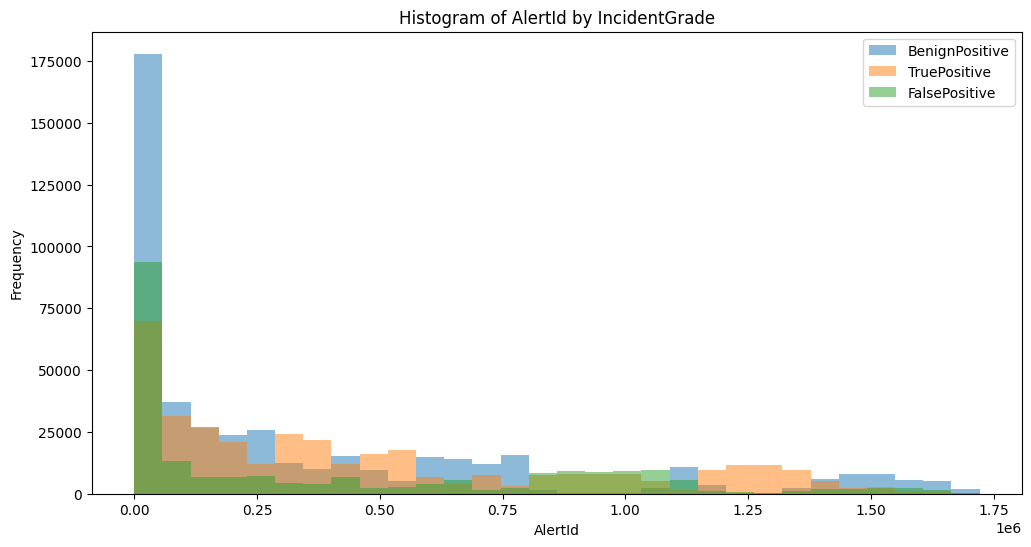

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
for grade in cs_train_df['IncidentGrade'].unique():
    subset = cs_train_df[cs_train_df['IncidentGrade'] == grade]
    plt.hist(subset['AlertId'], bins=30, alpha=0.5, label=grade)

plt.xlabel('AlertId')
plt.ylabel('Frequency')
plt.title('Histogram of AlertId by IncidentGrade')
plt.legend()
plt.show()

In [13]:

# # Create new column 'Alert_Incident' based on 'IncidentGrade'
# cs_train_df['Alert_Incident'] = cs_train_df['AlertId'].apply(
#     lambda x: 'True_alert' if cs_train_df.loc[cs_train_df['AlertId'] == x, 'IncidentGrade'].values[0] == 'True Positive'
#     else 'False_alert'
# )
# cs_train_df.head()
incident_mapping = {
    'True Positive': 'True_alert',
    'Benign Positive': 'Benign_alert',
    'False Positive': 'False_alert'
}

cs_train_df['Alert_Incident'] = cs_train_df['IncidentGrade'].map(incident_mapping).fillna('Unknown_alert')
cs_test_df['Alert_Incident'] = cs_test_df['IncidentGrade'].map(incident_mapping).fillna('Unknown_alert')


In [29]:
cs_train_df.columns

Index(['OrgId', 'Category', 'MitreTechniques', 'IncidentGrade',
       'ActionGrouped', 'ActionGranular', 'EntityType', 'EvidenceRole',
       'Sha256', 'IpAddress', 'Url', 'AccountUpn', 'AccountName', 'DeviceName',
       'EmailClusterId', 'RegistryKey', 'RegistryValueName',
       'RegistryValueData', 'ApplicationName', 'ThreatFamily', 'FileName',
       'FolderPath', 'ResourceIdName', 'ResourceType', 'Roles', 'OSFamily',
       'OSVersion', 'AntispamDirection', 'SuspicionLevel', 'LastVerdict',
       'CountryCode', 'State', 'City', 'Year', 'Month', 'Day', 'Hour',
       'DayOfWeek', 'Alert_Incident'],
      dtype='object')

In [32]:
import pandas as pd

# Select the first 500 rows
df_to_save = cs_train_df.head(500)

# Save to Excel file
df_to_save.to_excel('cs_train_sample.xlsx', index=False)


In [14]:
cat_columns=['OrgId', 'Category', 'MitreTechniques', 'IncidentGrade',
       'ActionGrouped', 'ActionGranular', 'EntityType', 'EvidenceRole',
       'Sha256', 'IpAddress', 'Url', 'AccountUpn', 'AccountName', 'DeviceName',
       'EmailClusterId', 'RegistryKey', 'RegistryValueName',
       'RegistryValueData', 'ApplicationName', 'ThreatFamily', 'FileName',
       'FolderPath', 'ResourceIdName', 'ResourceType', 'Roles', 'OSFamily',
       'OSVersion', 'AntispamDirection', 'SuspicionLevel', 'LastVerdict',
       'CountryCode', 'State', 'City', 'Month', 'Day',
       'DayOfWeek', 'Alert_Incident']

In [15]:
# Consolidating top 5 features and putting rest to others category

def consolidate_categories(df, column, top_n=5):
    """Replace less frequent categories with 'Others'"""
    # Count frequencies
    freq = df[column].value_counts()
    
    # Get top N categories
    top_categories = freq.nlargest(top_n).index
    
    # Create a mapping of categories
    df[column] = df[column].apply(lambda x: x if x in top_categories else 'Others')

# Apply the consolidation for each categorical column
for col in cat_columns:
    consolidate_categories(cs_train_df, col)

for col1 in cat_columns:
    consolidate_categories(cs_test_df, col1)



In [ ]:
#cs_train_df.to_excel("H:\IIT-M GUVI\Projects capstone\Project4\cs_train_df.xlsx")

In [16]:
# Categorical columns
categorical_cols = cs_train_df.select_dtypes(include=['object']).columns
categorical_cols_test = cs_test_df.select_dtypes(include=['object']).columns

In [17]:
# Numerical columns
numerical_cols = cs_train_df.select_dtypes(include=['int64','int32','float64']).columns
numerical_cols_test = cs_test_df.select_dtypes(include=['int64','int32','float64']).columns

In [19]:
cs_train_df.columns

Index(['OrgId', 'AlertId', 'Category', 'MitreTechniques', 'IncidentGrade',
       'ActionGrouped', 'ActionGranular', 'EntityType', 'EvidenceRole',
       'Sha256', 'IpAddress', 'Url', 'AccountUpn', 'AccountName', 'DeviceName',
       'EmailClusterId', 'RegistryKey', 'RegistryValueName',
       'RegistryValueData', 'ApplicationName', 'ThreatFamily', 'FileName',
       'FolderPath', 'ResourceIdName', 'ResourceType', 'Roles', 'OSFamily',
       'OSVersion', 'AntispamDirection', 'SuspicionLevel', 'LastVerdict',
       'CountryCode', 'State', 'City', 'Year', 'Month', 'Day', 'Hour',
       'DayOfWeek', 'Alert_Incident'],
      dtype='object')

In [20]:
cs_test_df.columns

Index(['OrgId', 'AlertId', 'Category', 'MitreTechniques', 'IncidentGrade',
       'ActionGrouped', 'ActionGranular', 'EntityType', 'EvidenceRole',
       'Sha256', 'IpAddress', 'Url', 'AccountUpn', 'AccountName', 'DeviceName',
       'EmailClusterId', 'RegistryKey', 'RegistryValueName',
       'RegistryValueData', 'ApplicationName', 'ThreatFamily', 'FileName',
       'FolderPath', 'ResourceIdName', 'ResourceType', 'Roles', 'OSFamily',
       'OSVersion', 'AntispamDirection', 'SuspicionLevel', 'LastVerdict',
       'CountryCode', 'State', 'City', 'Year', 'Month', 'Day', 'Hour',
       'DayOfWeek', 'Alert_Incident'],
      dtype='object')

In [21]:
cs_train_df.drop(columns=['AlertId'],inplace=True)
cs_test_df.drop(columns=['AlertId'],inplace=True)

## Visualizations

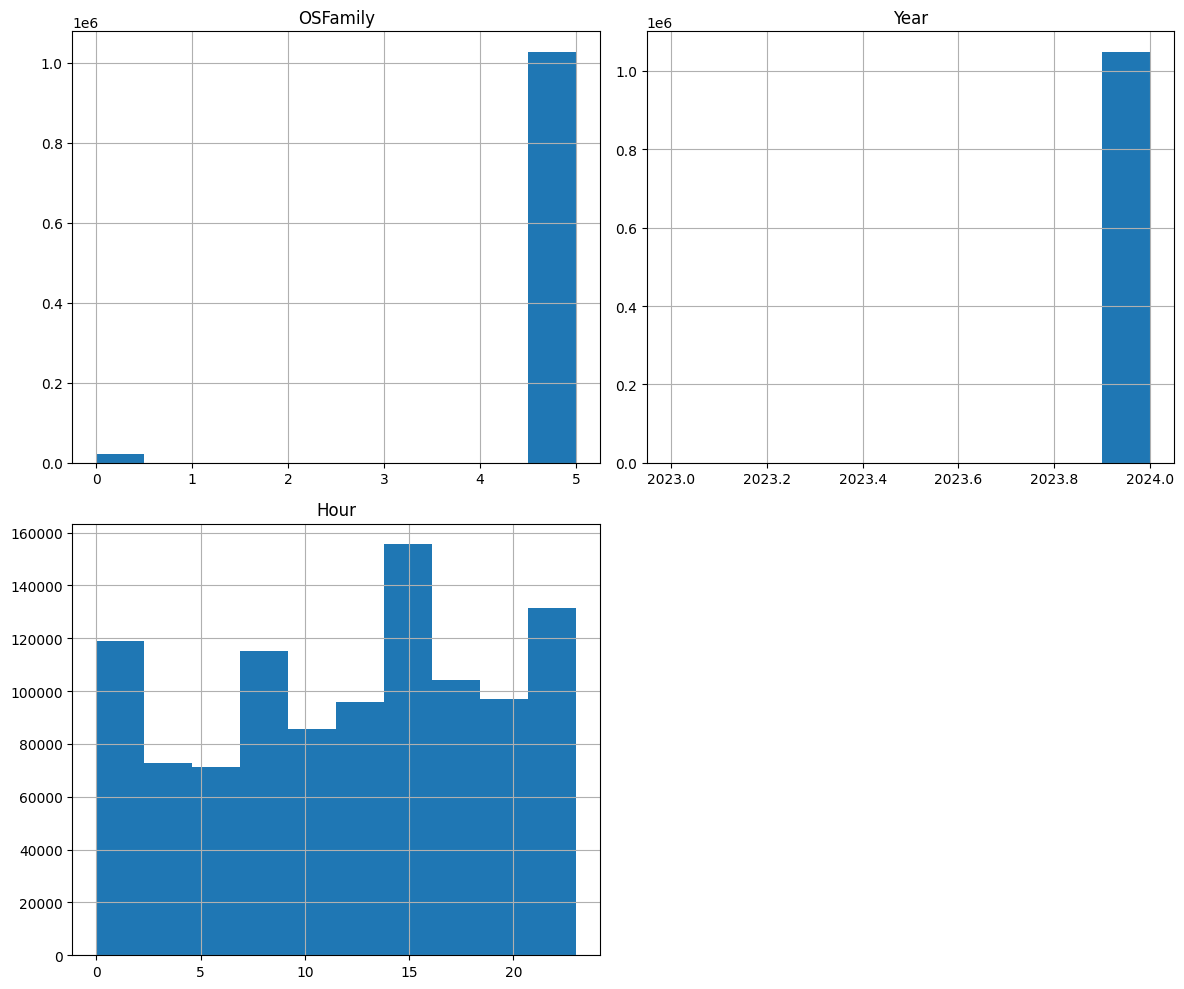

In [34]:
#Histograms to view distribution of features
import matplotlib.pyplot as plt

cs_train_df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

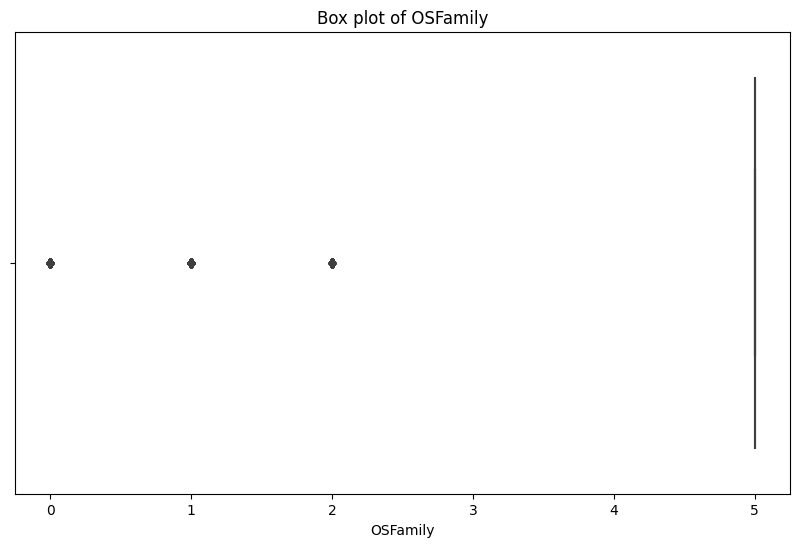

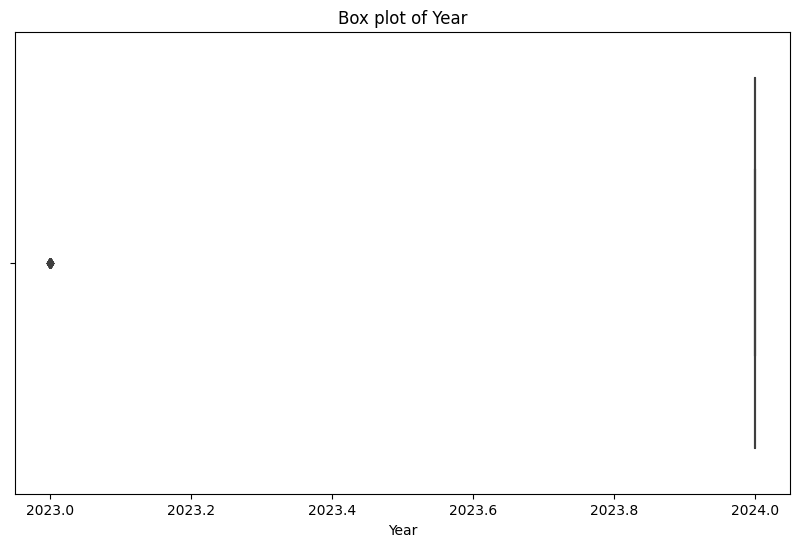

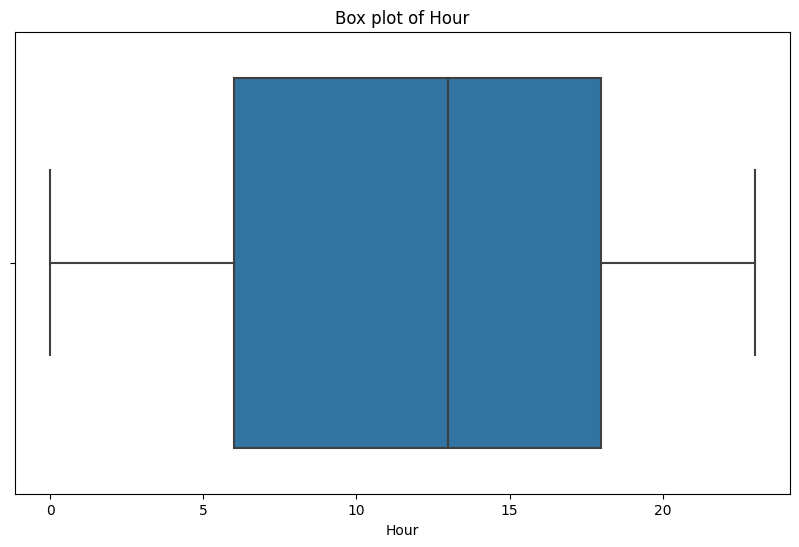

In [29]:
# Boxplot for detecting outliers
import seaborn as sns
import matplotlib.pyplot as plt

# Box plots for numerical features
for column in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=cs_train_df[column])
    plt.title(f'Box plot of {column}')
    plt.show()

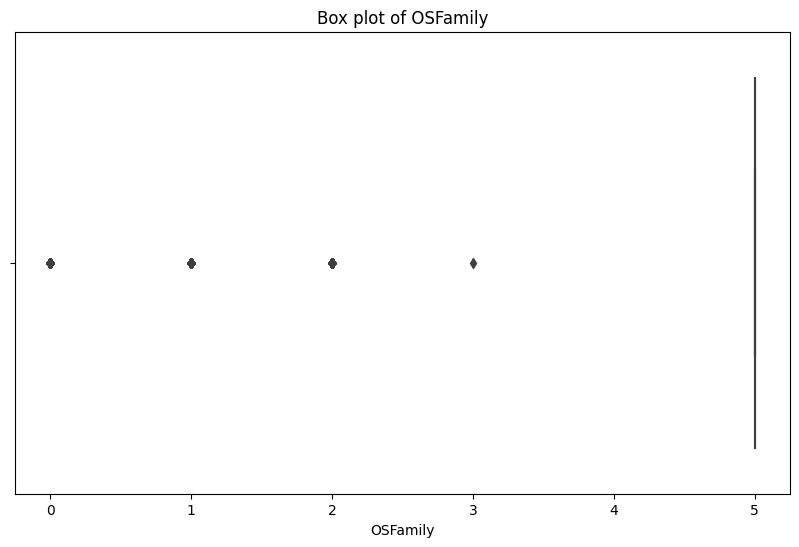

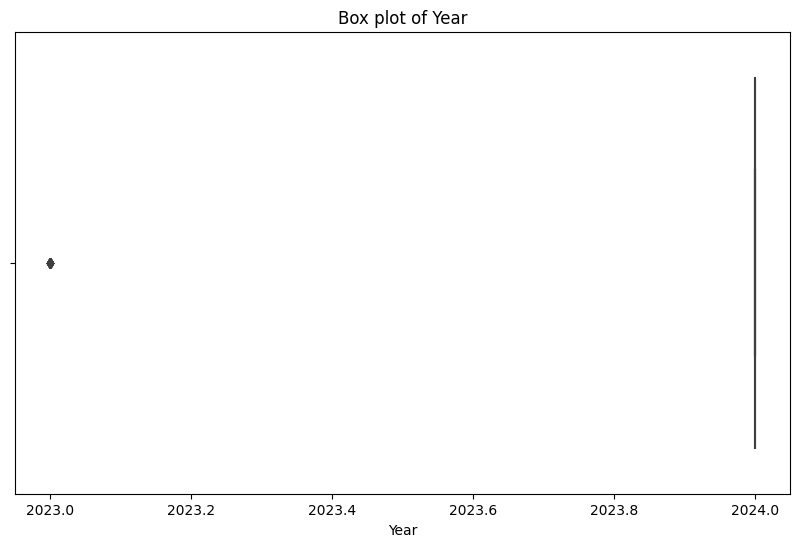

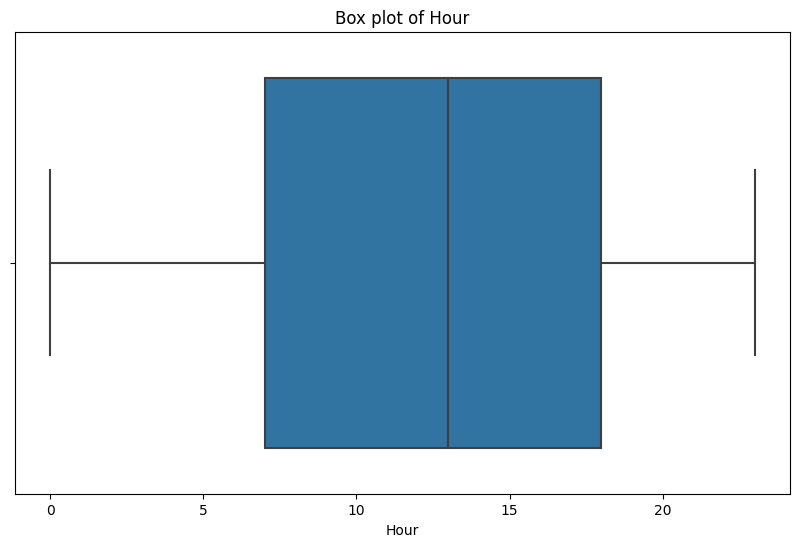

In [30]:
# Boxplot for detecting outliers
import seaborn as sns
import matplotlib.pyplot as plt

# Box plots for numerical features
for column in numerical_cols_test:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=cs_test_df[column])
    plt.title(f'Box plot of {column}')
    plt.show()

In [36]:
cs_train_df.columns

Index(['OrgId', 'Category', 'MitreTechniques', 'IncidentGrade',
       'ActionGrouped', 'ActionGranular', 'EntityType', 'EvidenceRole',
       'Sha256', 'IpAddress', 'Url', 'AccountUpn', 'AccountName', 'DeviceName',
       'EmailClusterId', 'RegistryKey', 'RegistryValueName',
       'RegistryValueData', 'ApplicationName', 'ThreatFamily', 'FileName',
       'FolderPath', 'ResourceIdName', 'ResourceType', 'Roles', 'OSFamily',
       'OSVersion', 'AntispamDirection', 'SuspicionLevel', 'LastVerdict',
       'CountryCode', 'State', 'City', 'Year', 'Month', 'Day', 'Hour',
       'DayOfWeek', 'Alert_Incident'],
      dtype='object')

In [31]:
cs_train_df.shape

(1048575, 39)

In [32]:
cs_test_df.shape

(1048575, 39)

In [22]:
#Removing outliers
import seaborn as sns
# sns.boxplot(x = cs_train_df['IncidentId'])
q1 = cs_train_df.OSFamily.quantile(0.25) 
q3 = cs_train_df.OSFamily.quantile(0.75) 
IQR = q3 - q1 

In [23]:
cs_train_df = cs_train_df[(cs_train_df.OSFamily >= (q1 - 1.5 * IQR)) & (cs_train_df.OSFamily <= (q3 + 1.5 * IQR)) ]

In [24]:
#Removing outliers
import seaborn as sns
# sns.boxplot(x = cs_train_df['IncidentId'])
q1 = cs_test_df.OSFamily.quantile(0.25) 
q3 = cs_test_df.OSFamily.quantile(0.75) 
IQR = q3 - q1 

In [25]:
cs_test_df = cs_test_df[(cs_test_df.OSFamily >= (q1 - 1.5 * IQR)) & (cs_test_df.OSFamily <= (q3 + 1.5 * IQR)) ]

In [26]:
#Removing outliers
import seaborn as sns
# sns.boxplot(x = cs_train_df['IncidentId'])
q1 = cs_train_df.Year.quantile(0.25) 
q3 = cs_train_df.Year.quantile(0.75) 
IQR = q3 - q1 

In [27]:
cs_train_df = cs_train_df[(cs_train_df.Year >= (q1 - 1.5 * IQR)) & (cs_train_df.Year <= (q3 + 1.5 * IQR)) ]

In [28]:
#Removing outliers
import seaborn as sns
# sns.boxplot(x = cs_train_df['IncidentId'])
q1 = cs_test_df.Year.quantile(0.25) 
q3 = cs_test_df.Year.quantile(0.75) 
IQR = q3 - q1 

In [29]:
cs_test_df = cs_test_df[(cs_test_df.Year >= (q1 - 1.5 * IQR)) & (cs_test_df.Year <= (q3 + 1.5 * IQR)) ]

In [41]:
cs_train_df.shape

(1027286, 39)

In [42]:
cs_test_df.shape

(1027237, 39)

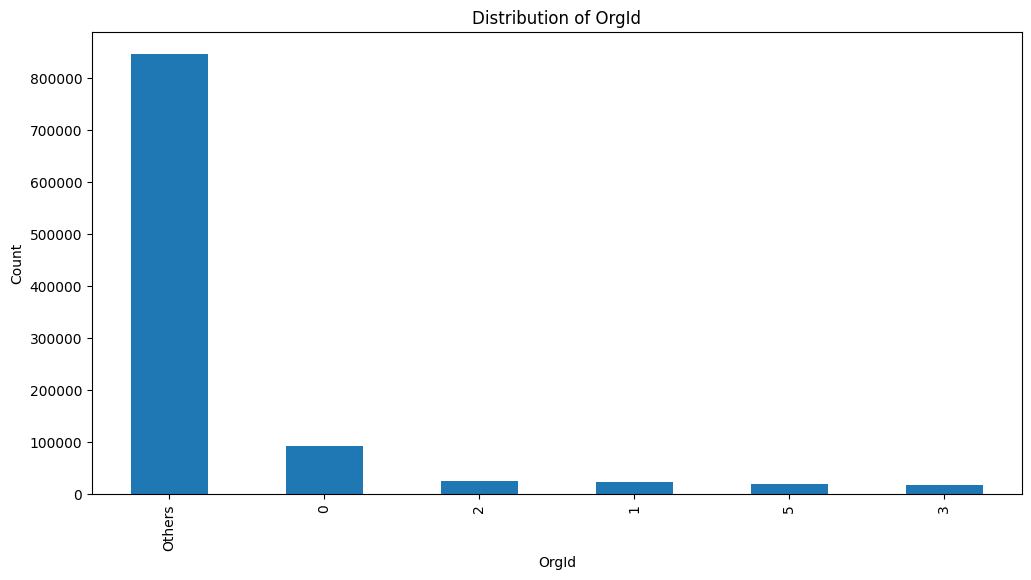

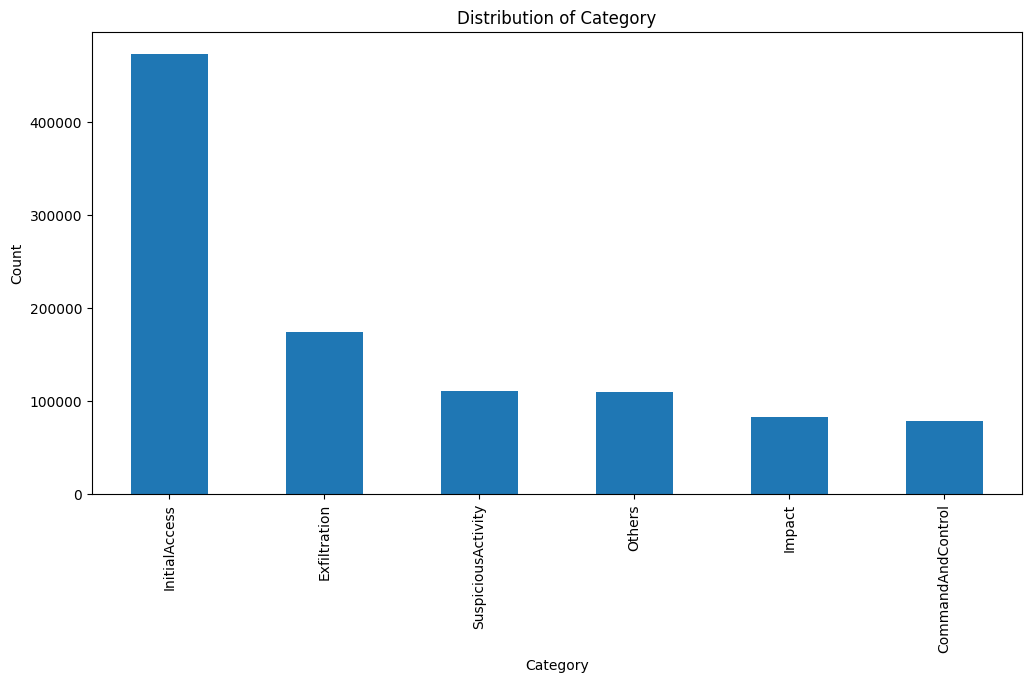

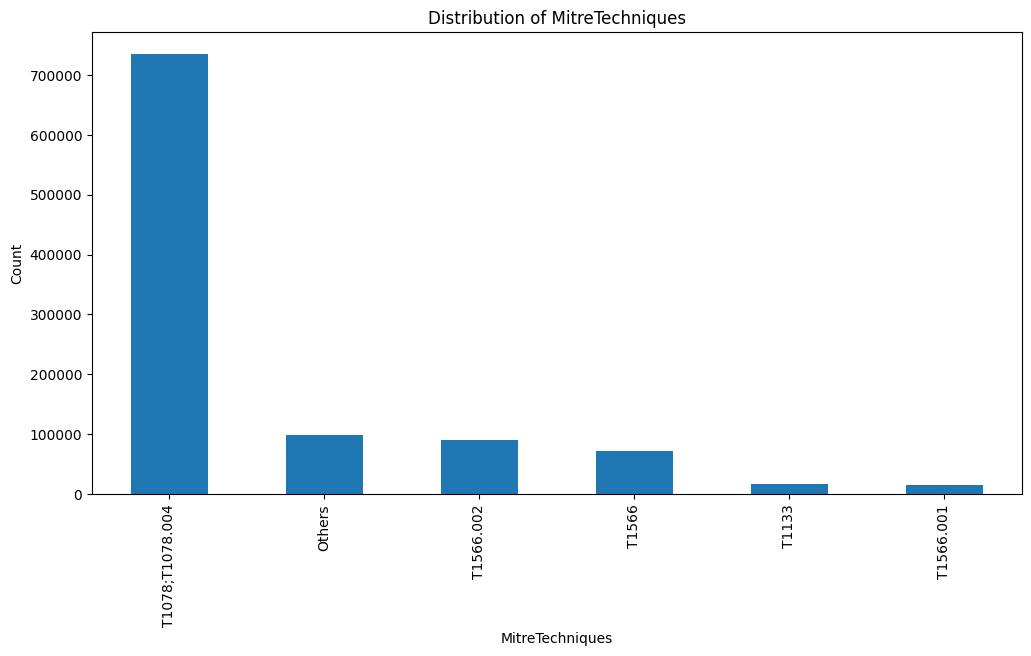

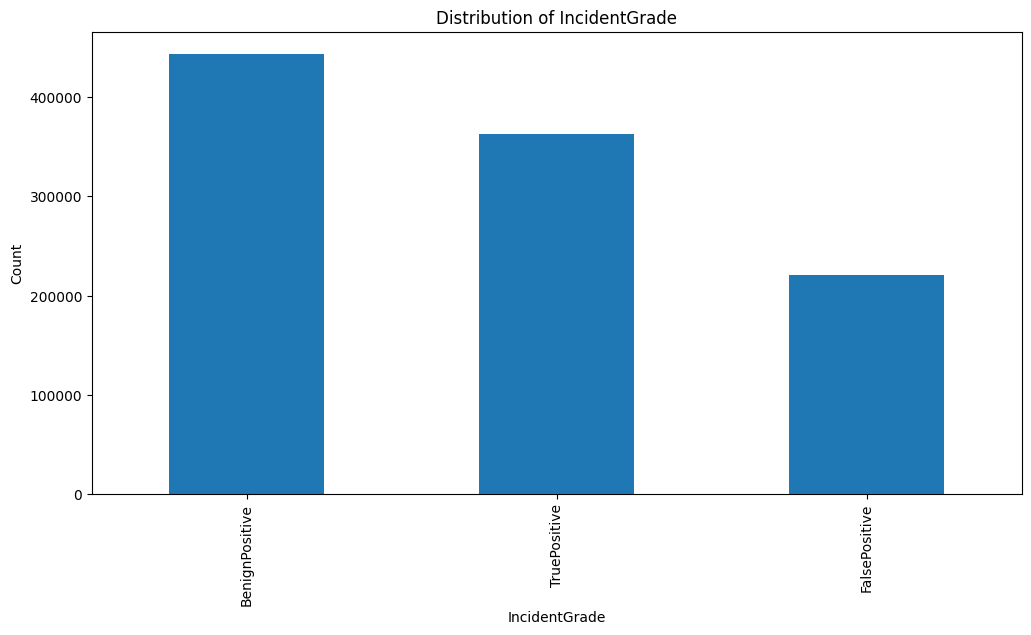

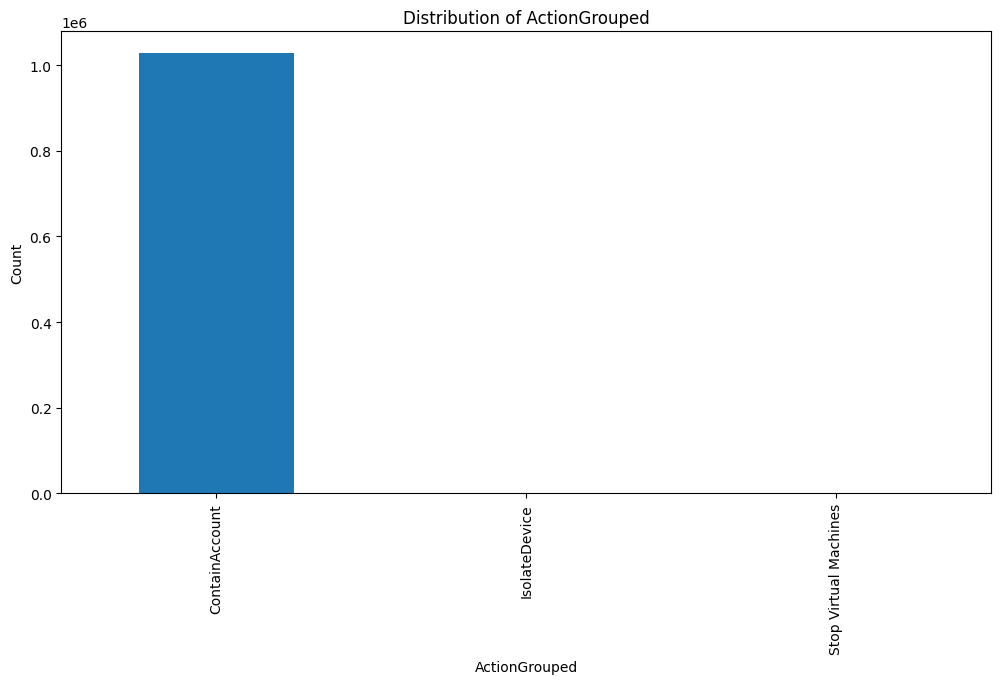

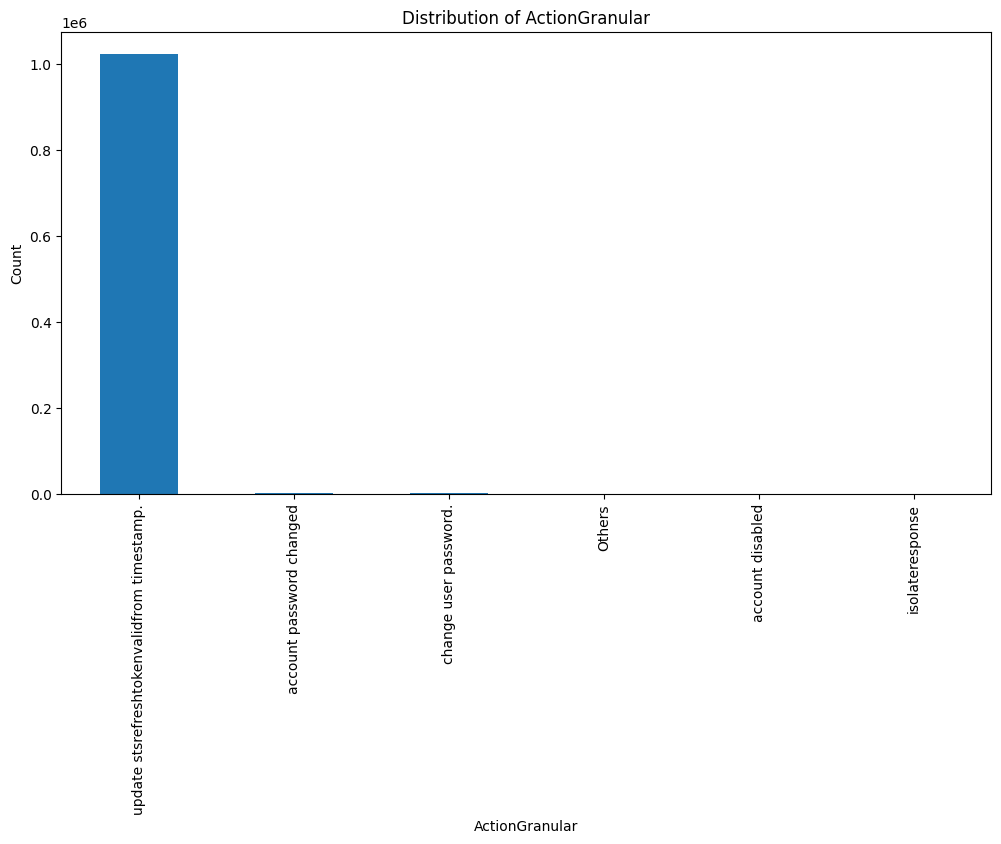

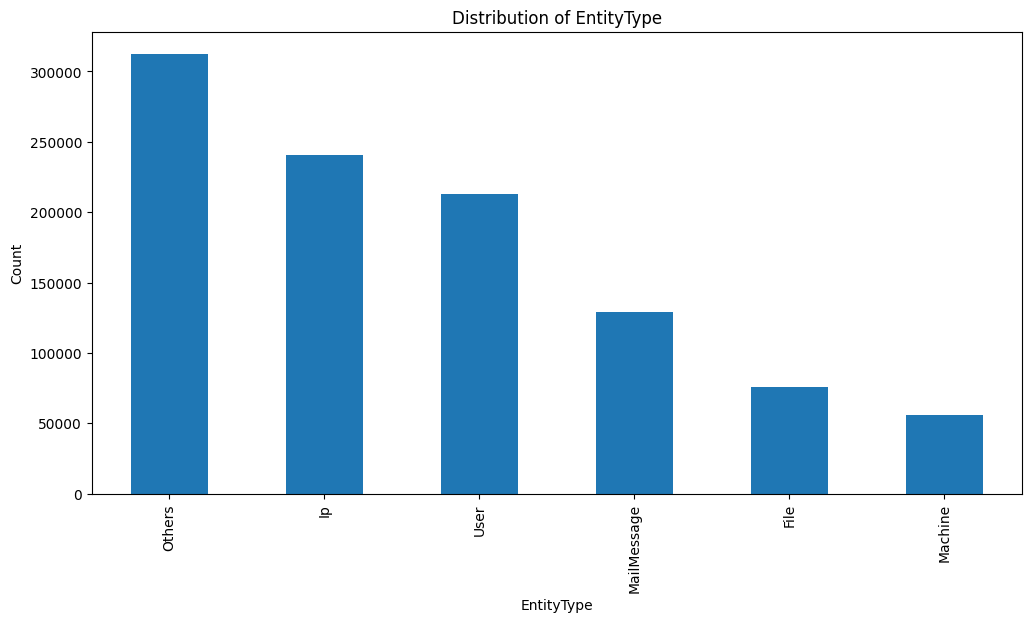

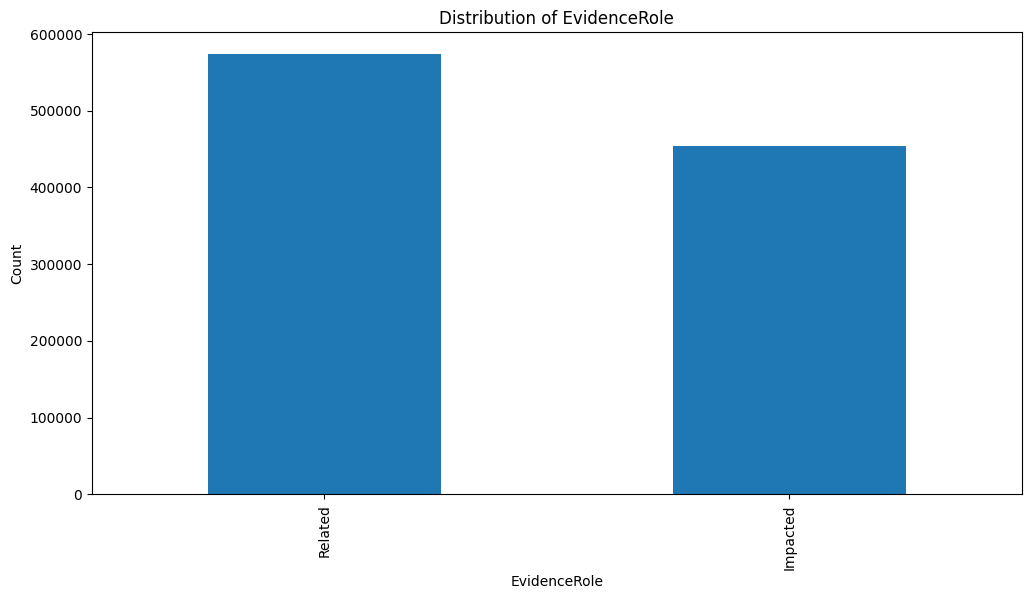

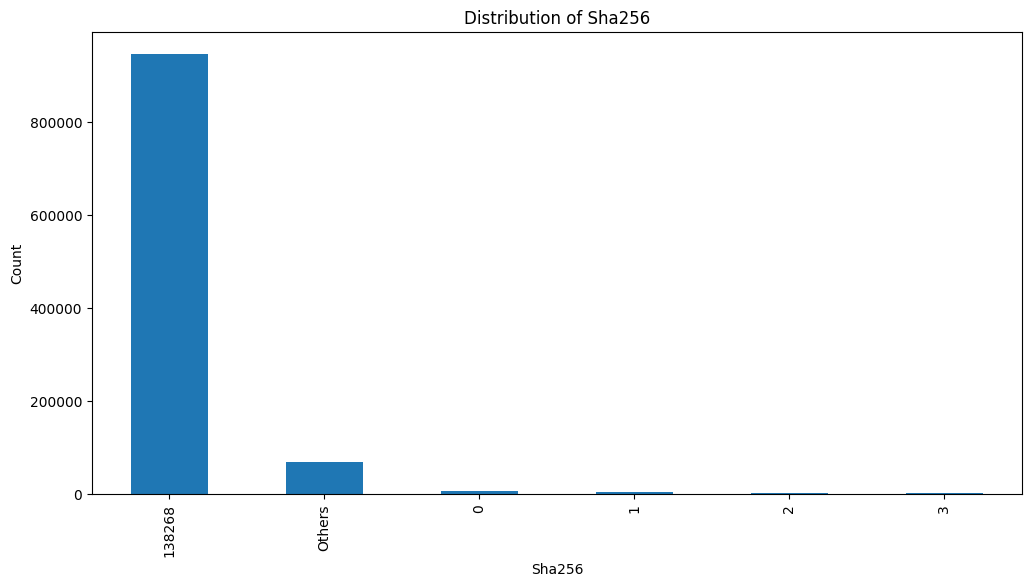

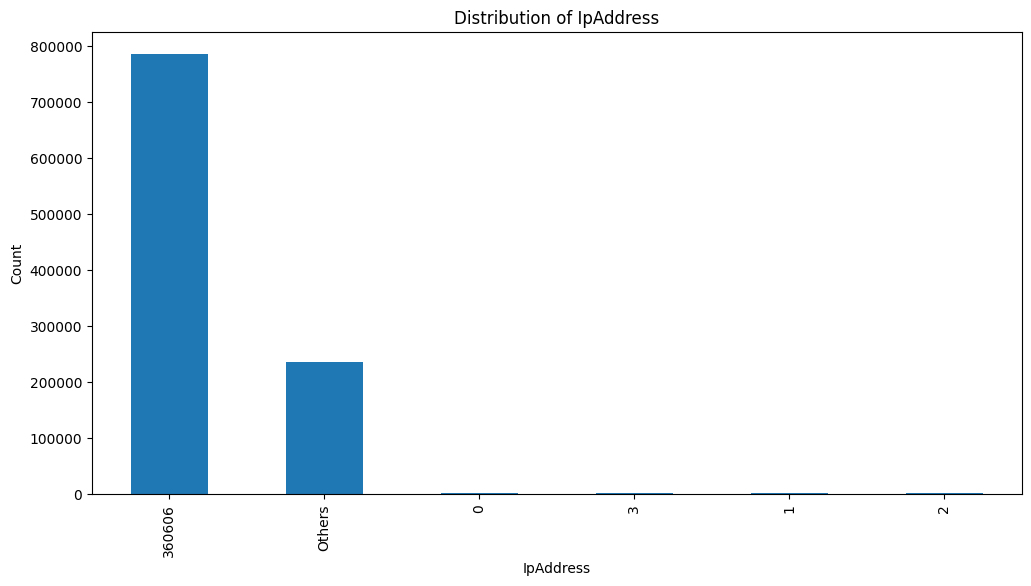

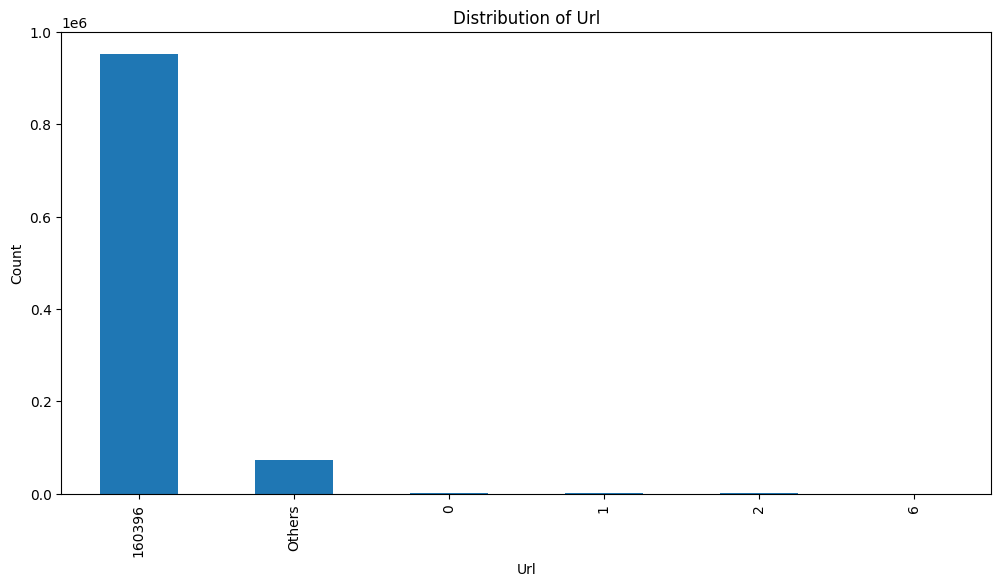

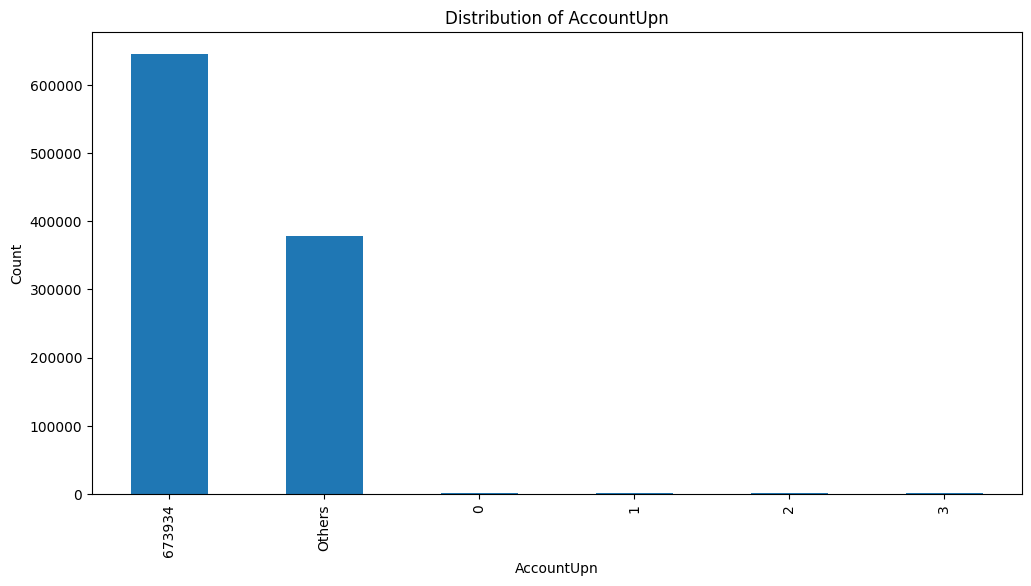

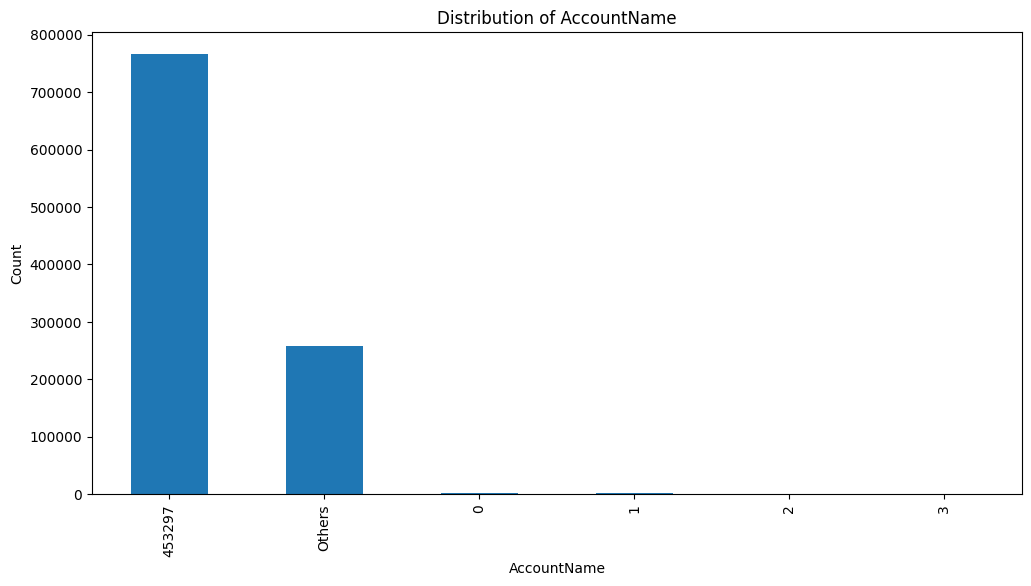

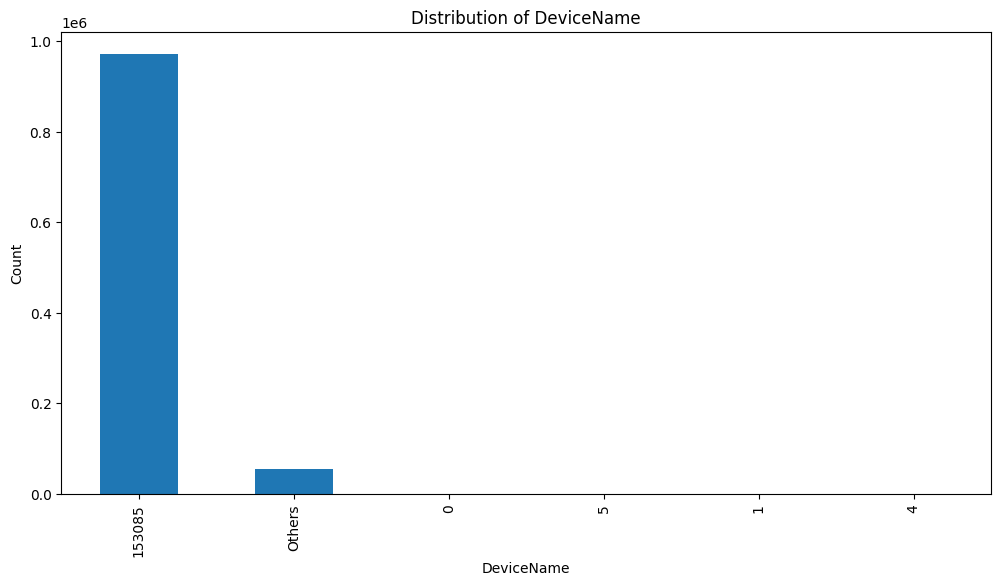

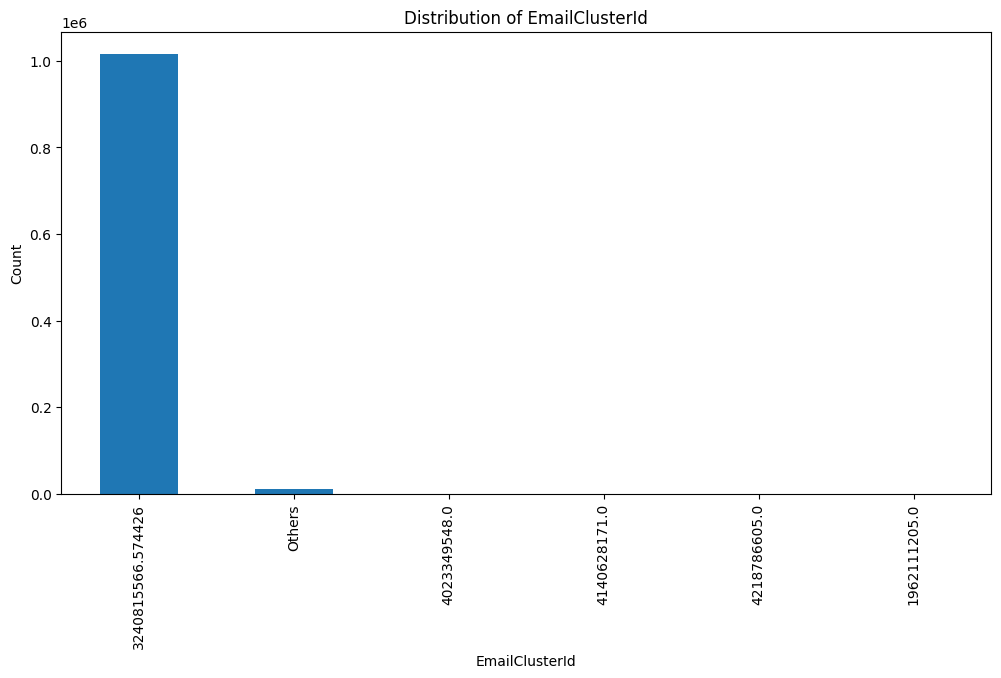

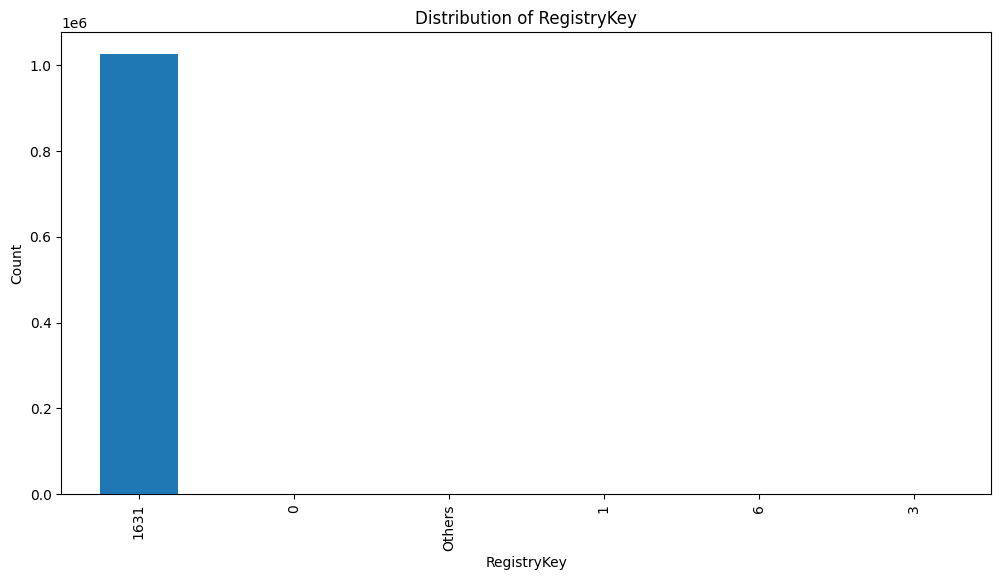

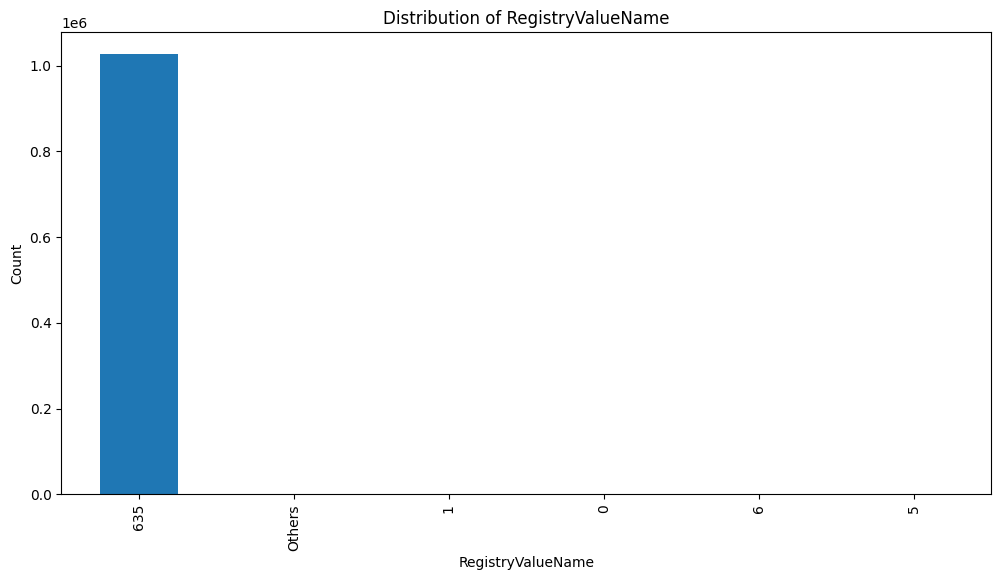

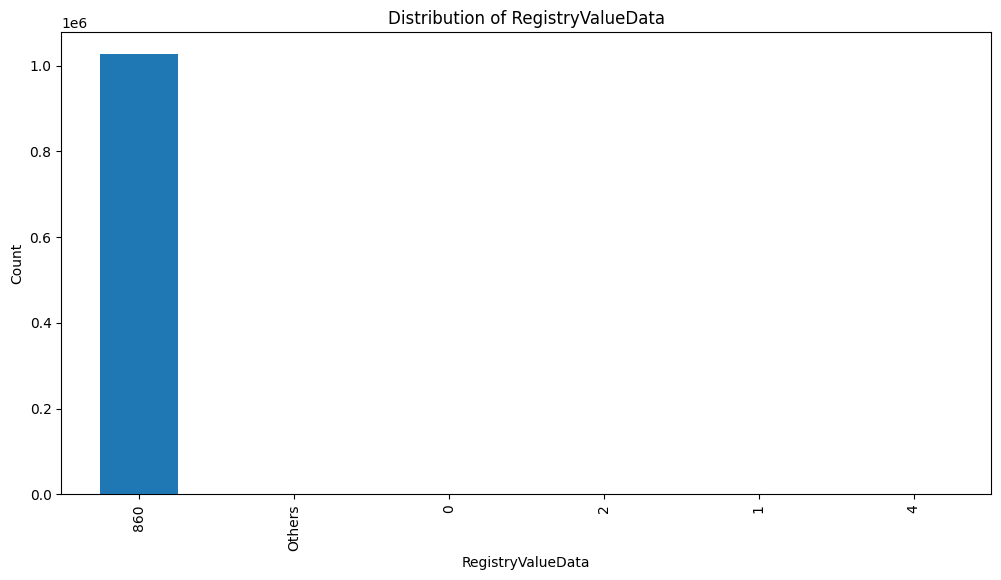

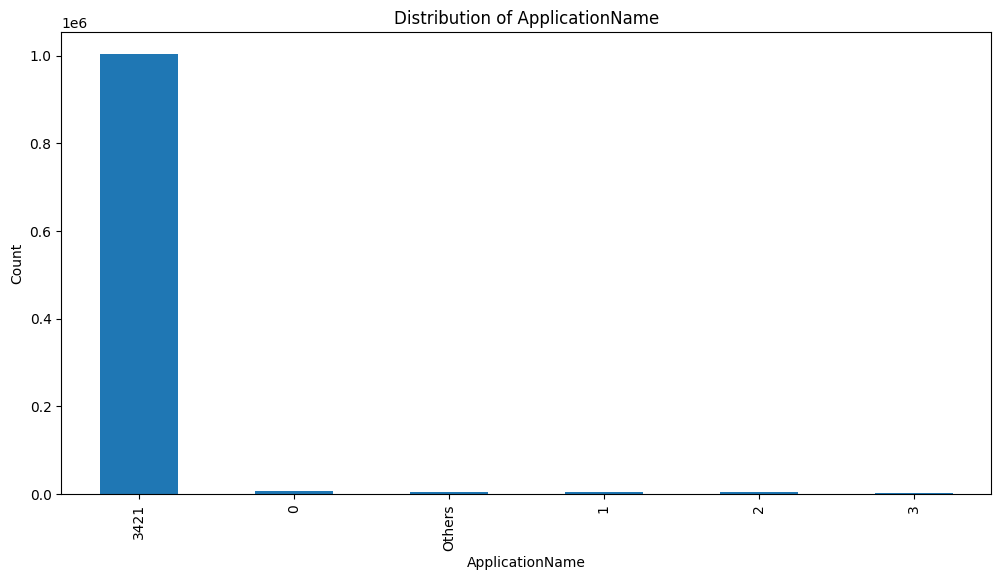

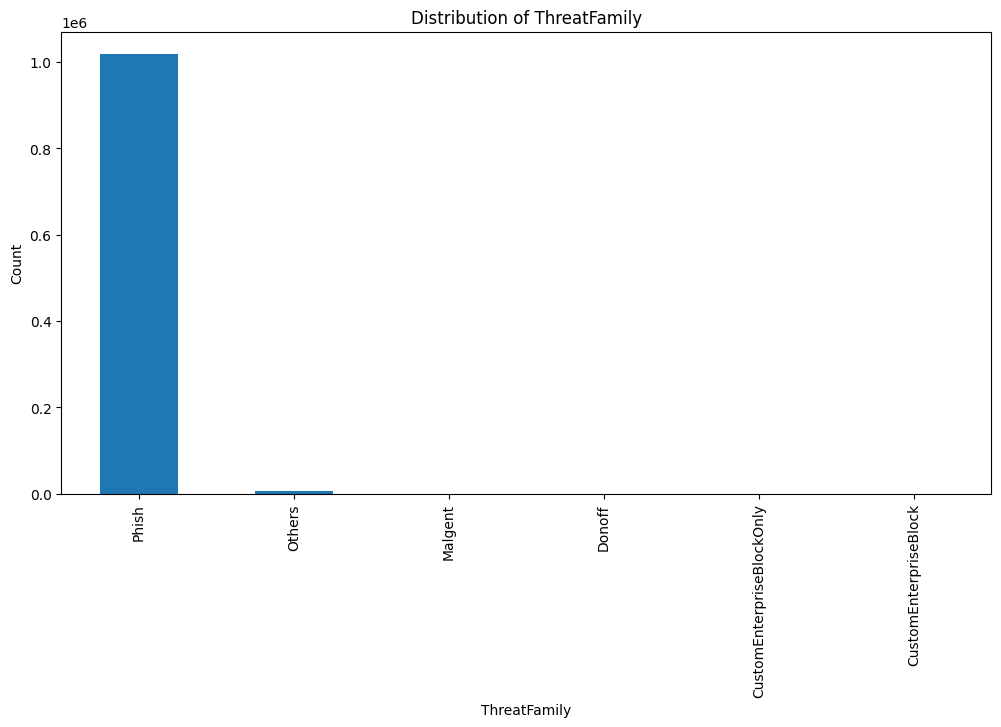

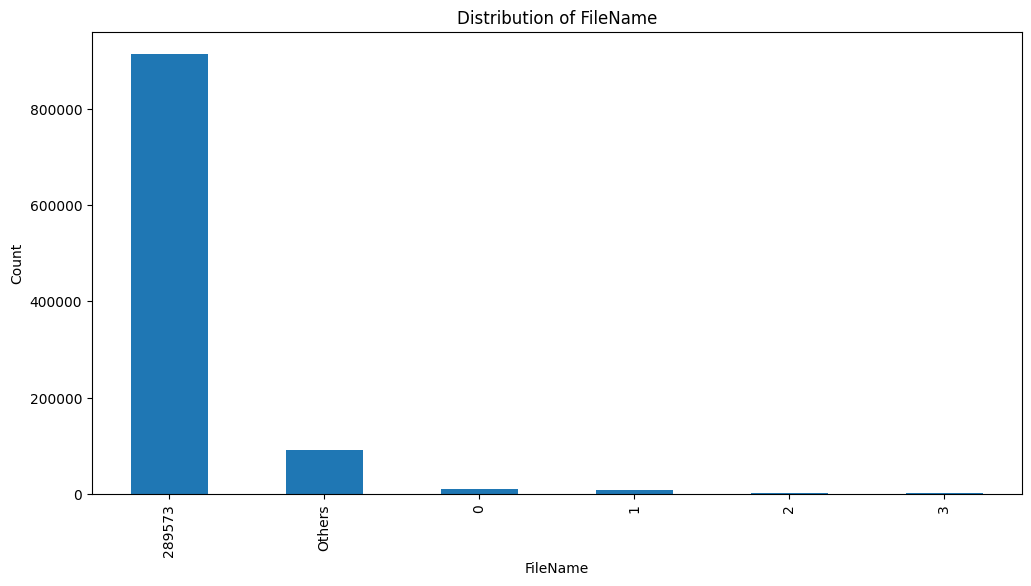

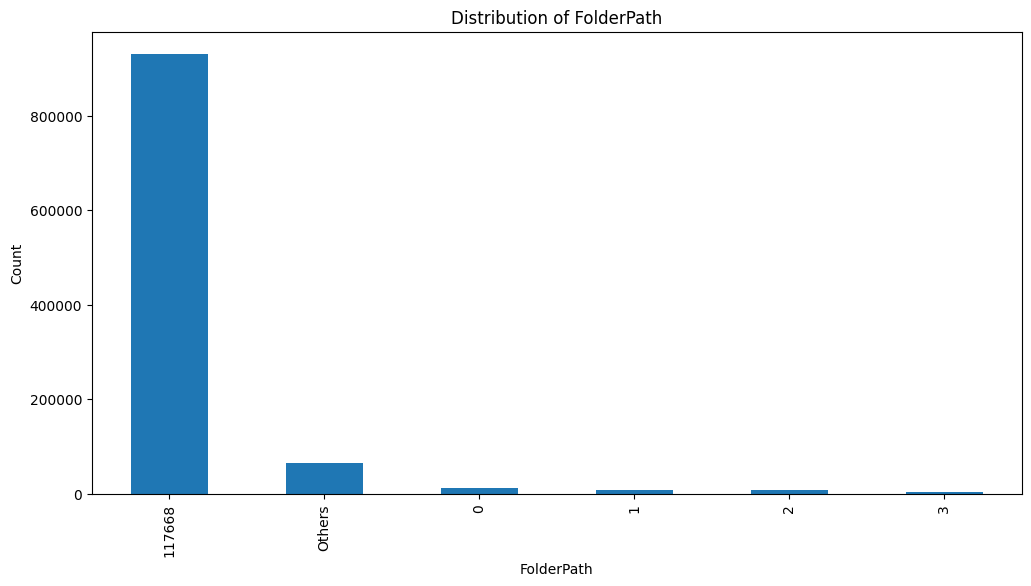

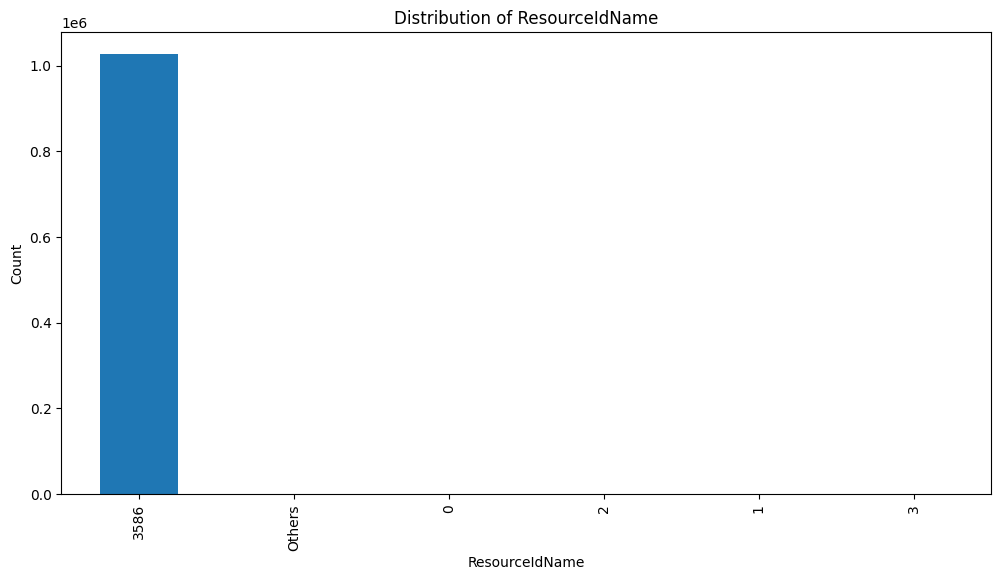

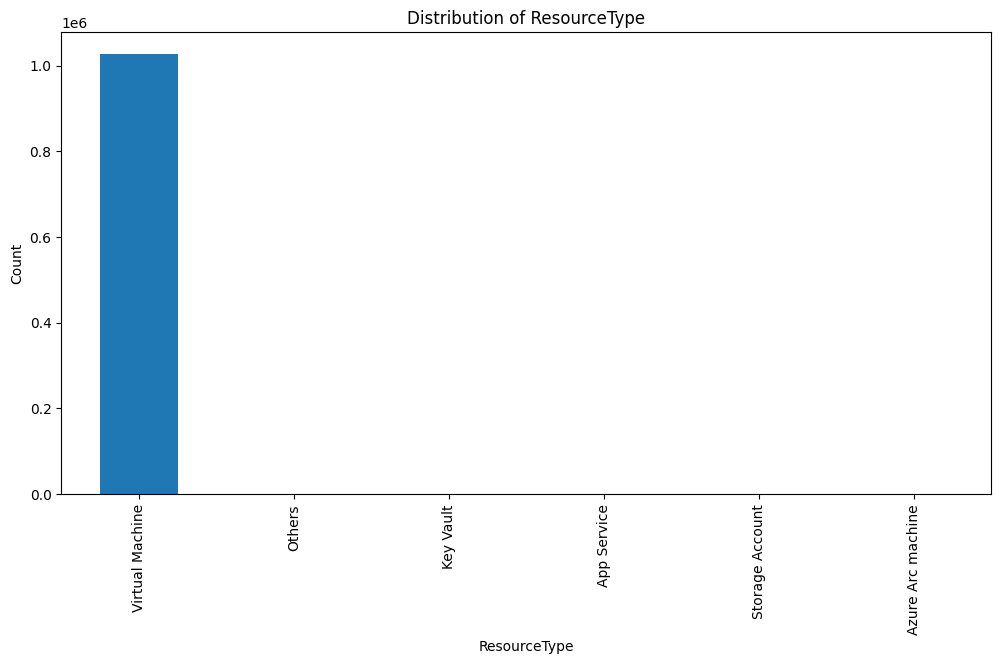

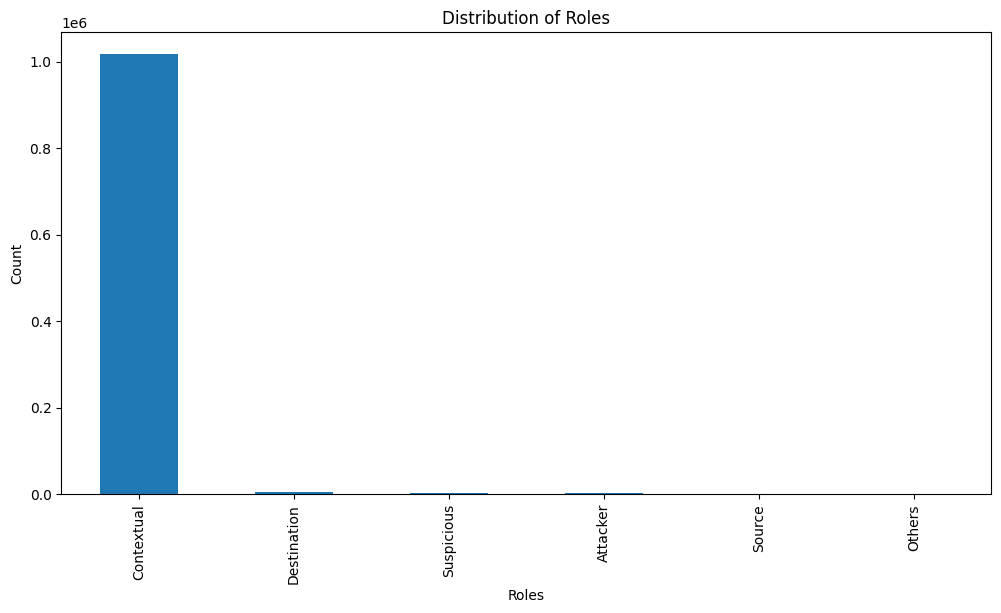

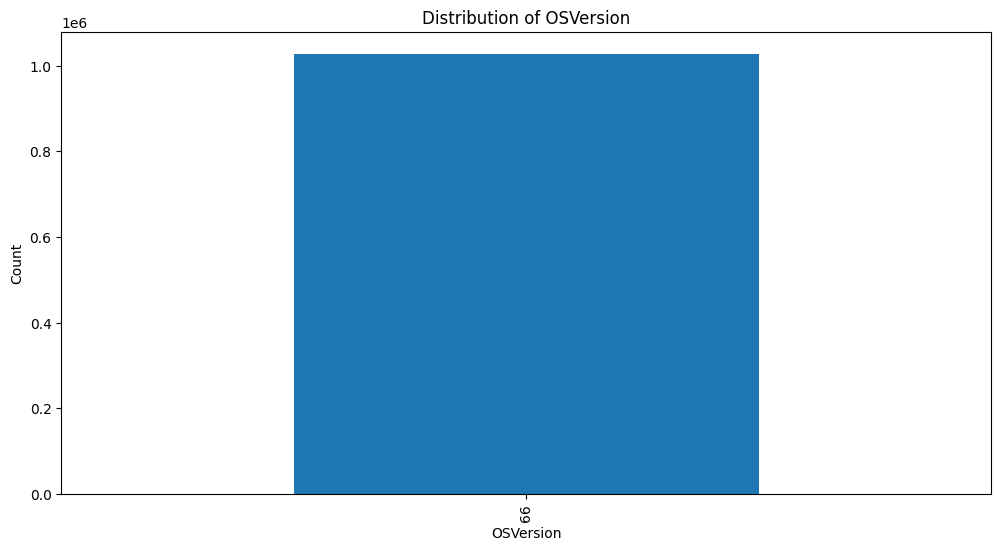

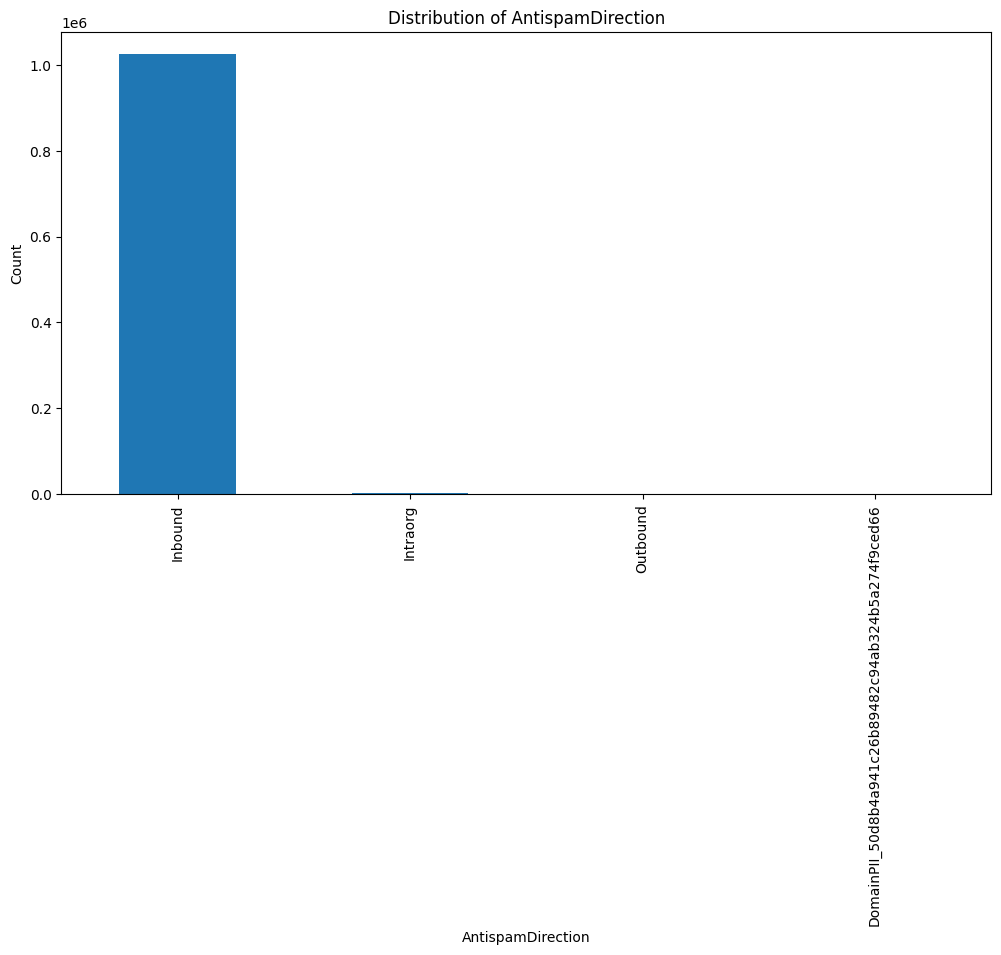

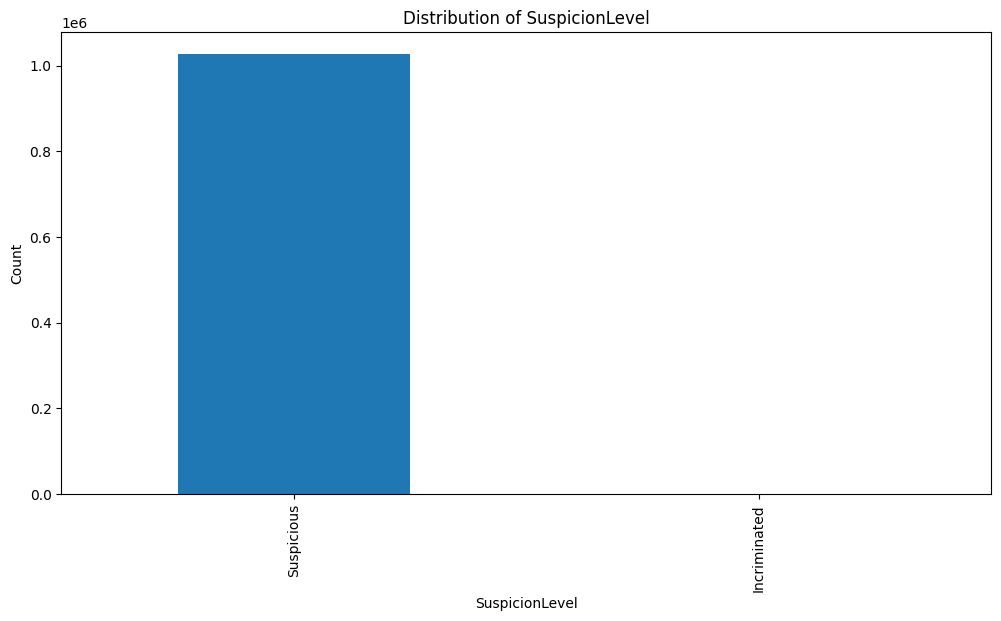

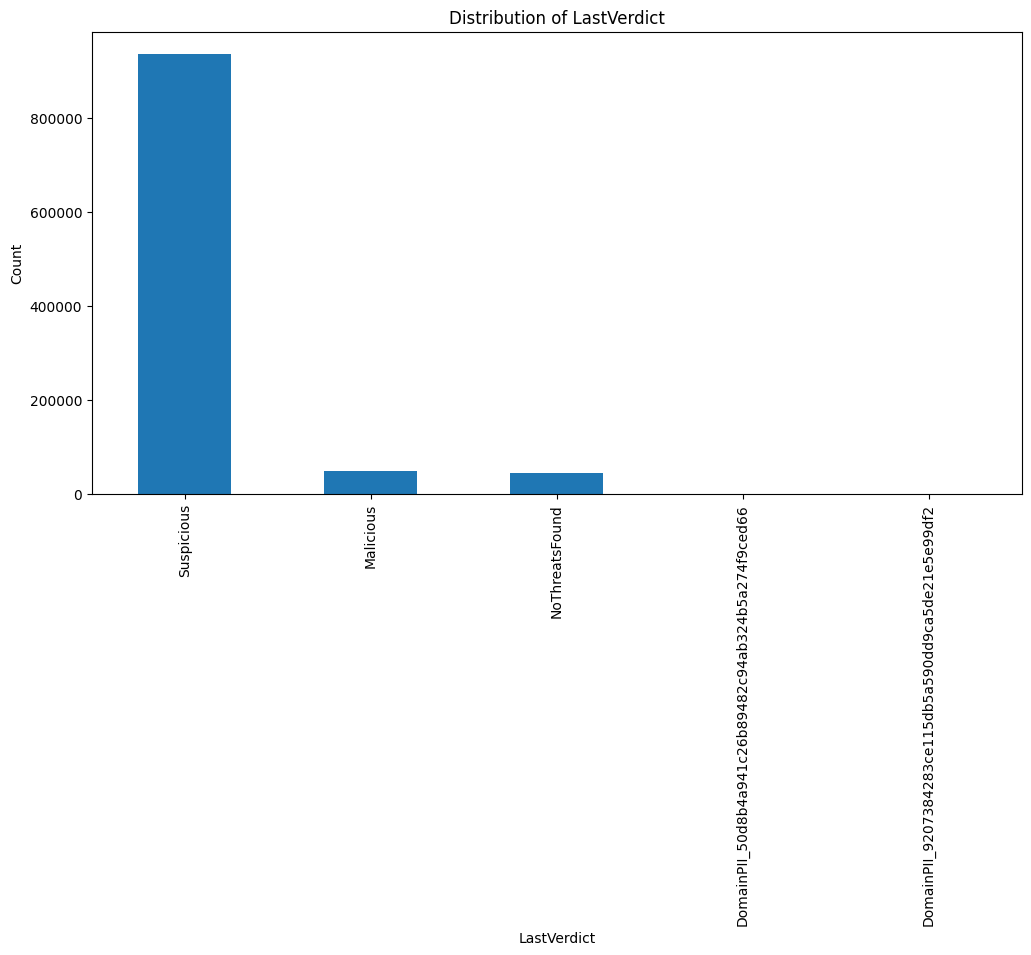

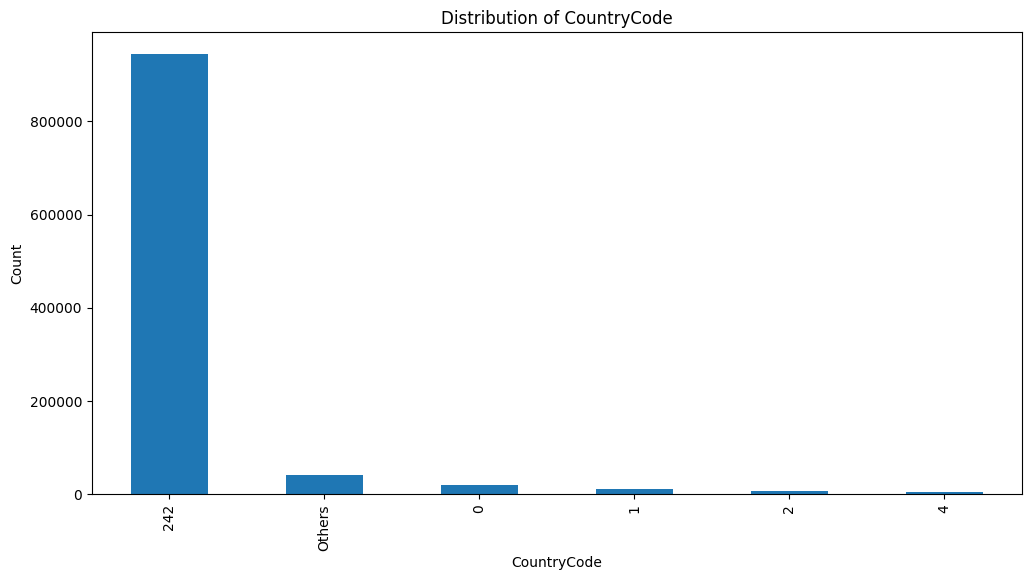

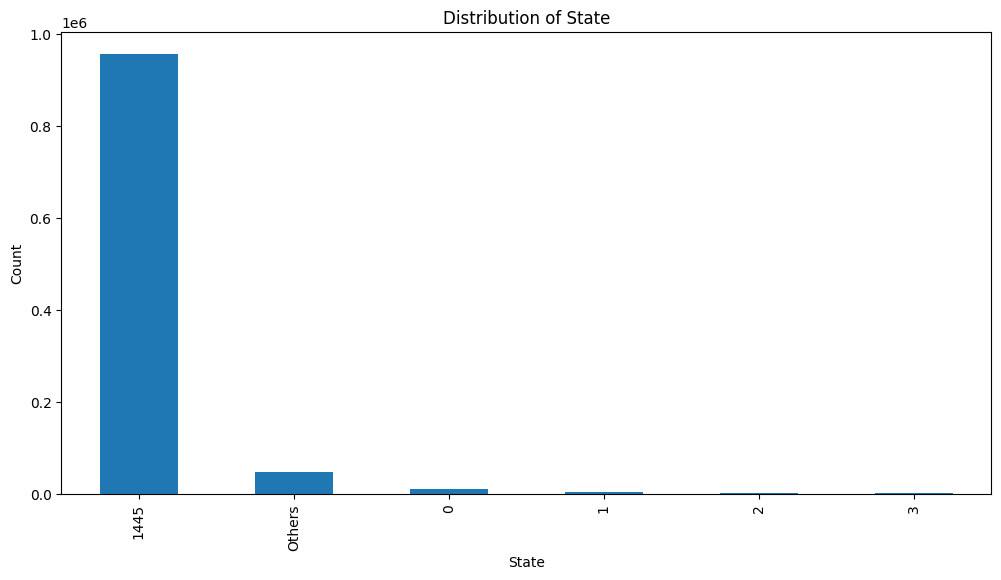

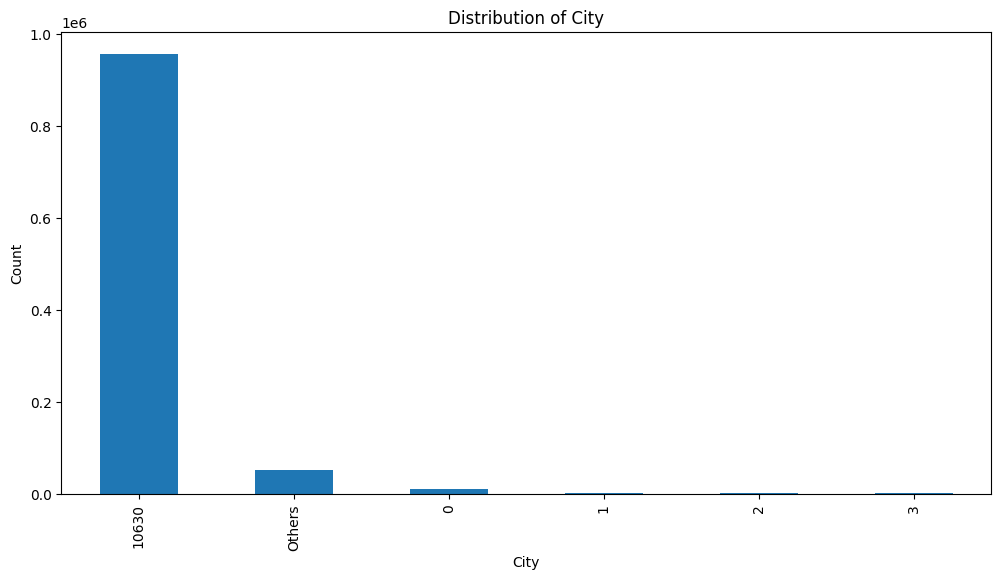

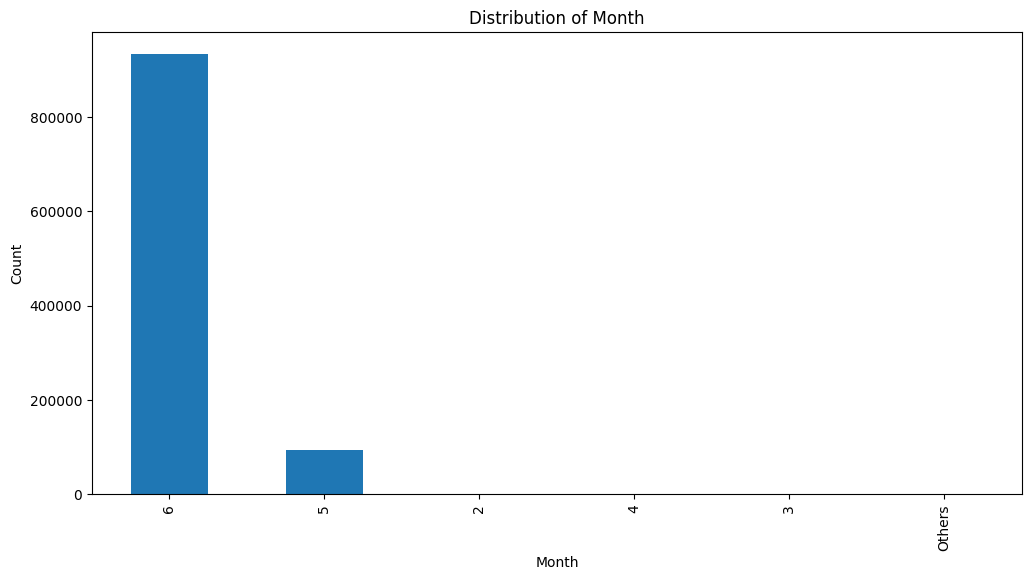

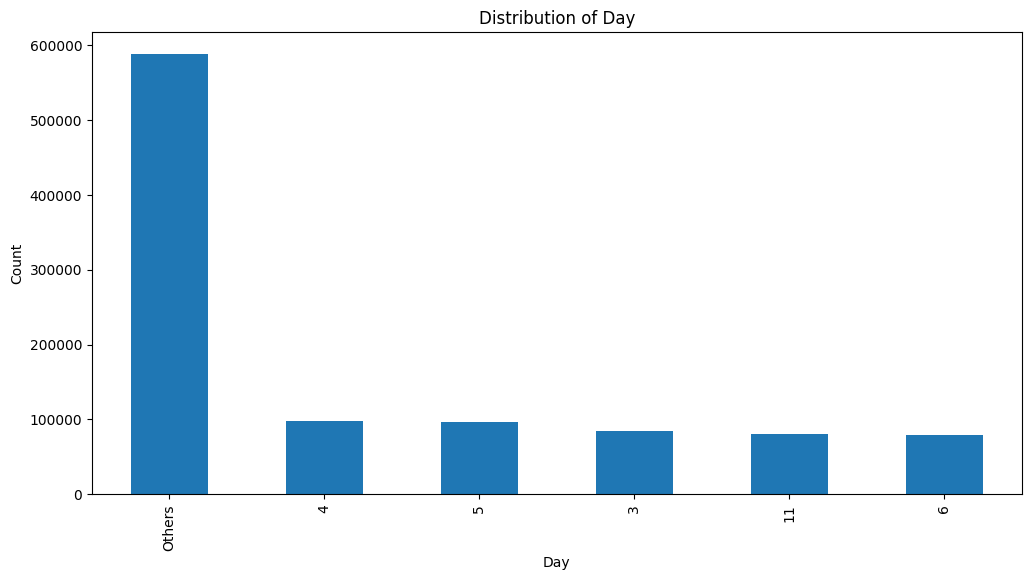

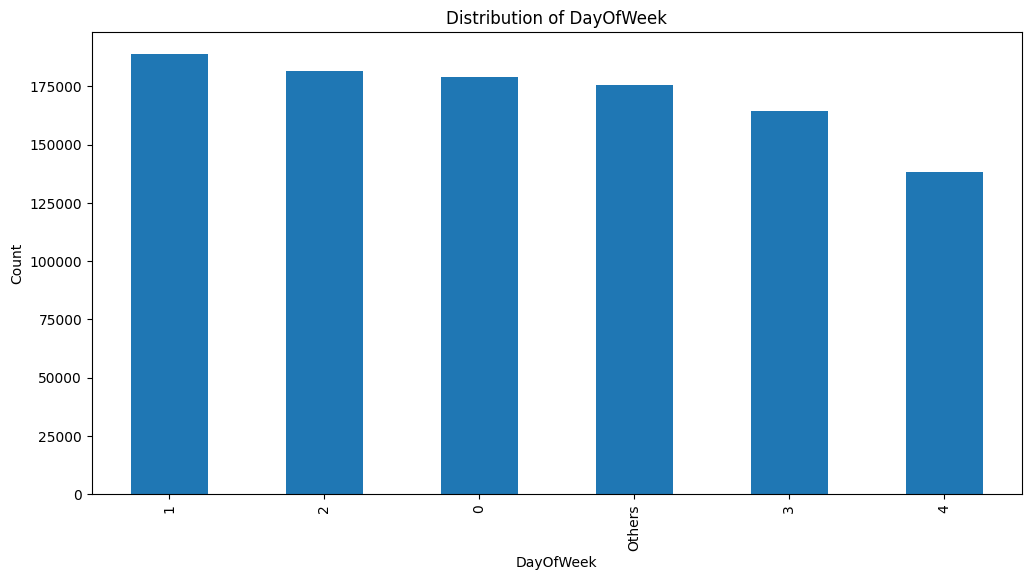

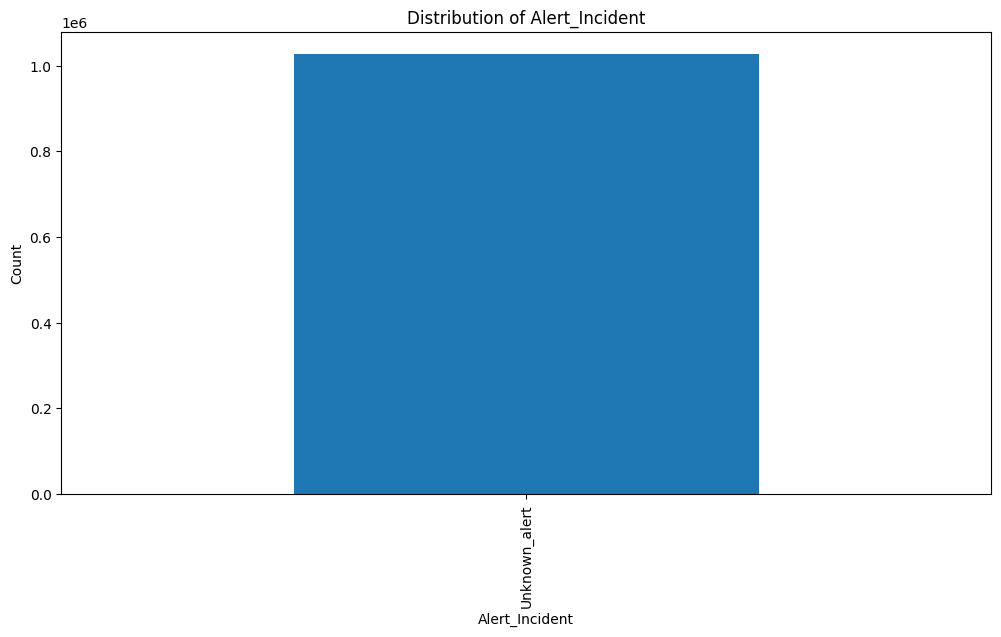

In [43]:
# Bar plots for categorical features
for column in cs_train_df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(12, 6))
    cs_train_df[column].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

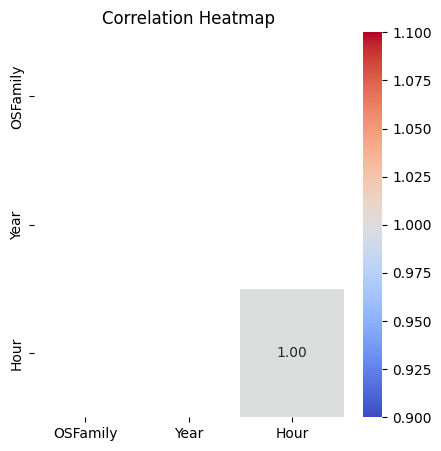

In [44]:
# Select only numerical columns for correlation
numerical_df = cs_train_df.select_dtypes(include=['float64', 'int64','int32'])

# Compute the correlation matrix
corr_matrix = numerical_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(5, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

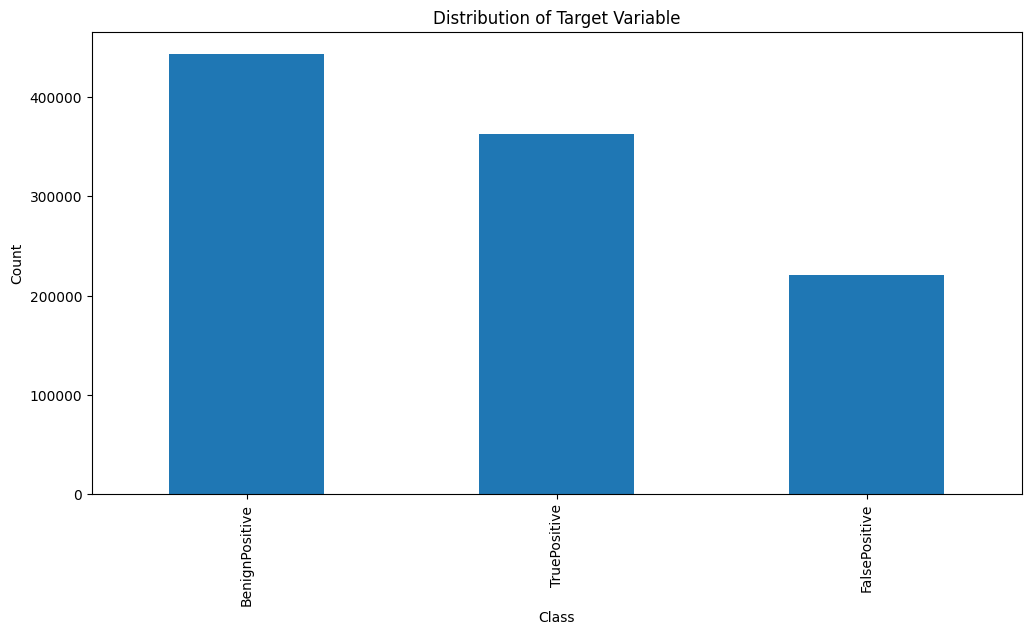

In [45]:
import matplotlib.pyplot as plt
# To check if targer variable class is unbalanced
plt.figure(figsize=(12, 6))
cs_train_df['IncidentGrade'].value_counts().plot(kind='bar')
plt.title('Distribution of Target Variable')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

## Encoding

In [30]:
# Numerical columns and categorical columns
numerical_cols = cs_train_df.select_dtypes(include=['number']).columns
categorical_cols = cs_train_df.select_dtypes(include=['object']).columns


In [48]:
cs_train_df.head()

,OrgId,Category,MitreTechniques,IncidentGrade,ActionGrouped,ActionGranular,EntityType,EvidenceRole,Sha256,IpAddress,...,LastVerdict,CountryCode,State,City,Year,Month,Day,Hour,DayOfWeek,Alert_Incident
0,Others,Others,T1078;T1078.004,BenignPositive,ContainAccount,update stsrefreshtokenvalidfrom timestamp.,File,Related,Others,360606,...,Malicious,242,1445,10630,2024,6,6,5,3,Unknown_alert
1,Others,Impact,T1078;T1078.004,BenignPositive,ContainAccount,update stsrefreshtokenvalidfrom timestamp.,Machine,Impacted,138268,360606,...,Suspicious,242,1445,10630,2024,6,3,10,0,Unknown_alert
2,Others,Others,Others,BenignPositive,ContainAccount,update stsrefreshtokenvalidfrom timestamp.,Machine,Impacted,138268,360606,...,Suspicious,242,1445,10630,2024,6,Others,3,3,Unknown_alert
3,Others,SuspiciousActivity,T1078;T1078.004,TruePositive,ContainAccount,update stsrefreshtokenvalidfrom timestamp.,File,Related,138268,360606,...,Suspicious,242,1445,10630,2024,6,Others,16,Others,Unknown_alert
4,Others,Exfiltration,T1078;T1078.004,BenignPositive,ContainAccount,update stsrefreshtokenvalidfrom timestamp.,File,Impacted,138268,360606,...,Suspicious,242,1445,10630,2024,6,Others,2,Others,Unknown_alert


In [31]:
cs_train_df_new=cs_train_df.copy()

In [50]:
cs_train_df_new.dtypes

OrgId                object
Category             object
MitreTechniques      object
IncidentGrade        object
ActionGrouped        object
ActionGranular       object
EntityType           object
EvidenceRole         object
Sha256               object
IpAddress            object
Url                  object
AccountUpn           object
AccountName          object
DeviceName           object
EmailClusterId       object
RegistryKey          object
RegistryValueName    object
RegistryValueData    object
ApplicationName      object
ThreatFamily         object
FileName             object
FolderPath           object
ResourceIdName       object
ResourceType         object
Roles                object
OSFamily              int64
OSVersion            object
AntispamDirection    object
SuspicionLevel       object
LastVerdict          object
CountryCode          object
State                object
City                 object
Year                  int32
Month                object
Day                 

In [51]:
# Numerical columns
numerical_cols = cs_train_df_new.select_dtypes(include=['number']).columns
numerical_cols

Index(['OSFamily', 'Year', 'Hour'], dtype='object')

In [32]:
cs_train_df_new.drop(columns=['OrgId','IpAddress','Url','AccountUpn','EmailClusterId','RegistryKey','FolderPath'],inplace=True)
cs_test_df.drop(columns=['OrgId','IpAddress','Url','AccountUpn','EmailClusterId','RegistryKey','FolderPath'],inplace=True)

In [33]:
# Categorical columns
categorical_cols_new = cs_train_df_new.select_dtypes(include=['object']).columns
categorical_cols_test = cs_test_df.select_dtypes(include=['object']).columns


In [34]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# List of columns to label encode
column_to_label_encode = [
    'IncidentGrade', 'Month', 'Day', 'DayOfWeek'
]

# Initialize a dictionary to store LabelEncoders
label_encoders = {}

# Copy the dataframe to avoid modifying the original dataframe
# cs_train_df_new1 = cs_train_df_new.copy()

# Loop through the specified columns and apply LabelEncoder
for col in column_to_label_encode:
    # Check if the column exists in the DataFrame
    if col in cs_train_df_new.columns:
        le = LabelEncoder()
        
        # Convert column to string to handle mixed types
        cs_train_df_new[col] = cs_train_df_new[col].astype(str)
        
        # Fit and transform the column
        cs_train_df_new[col] = le.fit_transform(cs_train_df_new[col])
        
        # Store the encoder in the dictionary
        label_encoders[col] = le
    else:
        print(f"Column '{col}' not found in the DataFrame.")

# Check the updated DataFrame
print(cs_train_df_new.head())


             Category  MitreTechniques  IncidentGrade   ActionGrouped  \
0              Others  T1078;T1078.004              0  ContainAccount   
1              Impact  T1078;T1078.004              0  ContainAccount   
2              Others           Others              0  ContainAccount   
3  SuspiciousActivity  T1078;T1078.004              2  ContainAccount   
4        Exfiltration  T1078;T1078.004              0  ContainAccount   

                               ActionGranular EntityType EvidenceRole  Sha256  \
0  update stsrefreshtokenvalidfrom timestamp.       File      Related  Others   
1  update stsrefreshtokenvalidfrom timestamp.    Machine     Impacted  138268   
2  update stsrefreshtokenvalidfrom timestamp.    Machine     Impacted  138268   
3  update stsrefreshtokenvalidfrom timestamp.       File      Related  138268   
4  update stsrefreshtokenvalidfrom timestamp.       File     Impacted  138268   

  AccountName DeviceName  ... LastVerdict CountryCode State   City  Year  

In [35]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# List of columns to label encode
column_to_label_encode = [
    'IncidentGrade', 'Month', 'Day', 'DayOfWeek'
]

# Initialize a dictionary to store LabelEncoders
label_encoders = {}

# Copy the dataframe to avoid modifying the original dataframe
# cs_train_df_new1 = cs_train_df_new.copy()

# Loop through the specified columns and apply LabelEncoder
for col in column_to_label_encode:
    # Check if the column exists in the DataFrame
    if col in cs_test_df.columns:
        le = LabelEncoder()
        
        # Convert column to string to handle mixed types
        cs_test_df[col] = cs_test_df[col].astype(str)
        
        # Fit and transform the column
        cs_test_df[col] = le.fit_transform(cs_test_df[col])
        
        # Store the encoder in the dictionary
        label_encoders[col] = le
    else:
        print(f"Column '{col}' not found in the DataFrame.")


In [36]:
# Perform one-hot encoding
one_hot_encoded_df = pd.get_dummies(cs_train_df_new[['Category', 'MitreTechniques', 'ActionGrouped',
       'ActionGranular', 'EntityType', 'EvidenceRole', 'Sha256', 'AccountName',
       'DeviceName', 'RegistryValueName', 'RegistryValueData',
       'ApplicationName', 'ThreatFamily', 'FileName', 'ResourceIdName',
       'ResourceType', 'Roles', 'OSVersion', 'AntispamDirection',
       'SuspicionLevel', 'LastVerdict', 'CountryCode', 'State', 'City', 'Alert_Incident']])



In [37]:
# Perform one-hot encoding
one_hot_encoded_test_df = pd.get_dummies(cs_test_df[['Category', 'MitreTechniques', 'ActionGrouped',
       'ActionGranular', 'EntityType', 'EvidenceRole', 'Sha256', 'AccountName',
       'DeviceName', 'RegistryValueName', 'RegistryValueData',
       'ApplicationName', 'ThreatFamily', 'FileName', 'ResourceIdName',
       'ResourceType', 'Roles', 'OSVersion', 'AntispamDirection',
       'SuspicionLevel', 'LastVerdict', 'CountryCode', 'State', 'City', 'Alert_Incident']])



In [38]:
# Concatenate with the rest of the DataFrame
cs_test_df_encoded = pd.concat([cs_test_df, one_hot_encoded_test_df], axis=1)
cs_test_df_encoded = cs_test_df_encoded.drop(columns=['Category', 'MitreTechniques', 'ActionGrouped',
       'ActionGranular', 'EntityType', 'EvidenceRole', 'Sha256', 'AccountName',
       'DeviceName', 'RegistryValueName', 'RegistryValueData',
       'ApplicationName', 'ThreatFamily', 'FileName', 'ResourceIdName',
       'ResourceType', 'Roles', 'OSVersion', 'AntispamDirection',
       'SuspicionLevel', 'LastVerdict', 'CountryCode', 'State', 'City', 'Alert_Incident'])


In [39]:
# Concatenate with the rest of the DataFrame
cs_train_df_encoded = pd.concat([cs_train_df_new, one_hot_encoded_df], axis=1)
cs_train_df_encoded = cs_train_df_encoded.drop(columns=['Category', 'MitreTechniques', 'ActionGrouped',
       'ActionGranular', 'EntityType', 'EvidenceRole', 'Sha256', 'AccountName',
       'DeviceName', 'RegistryValueName', 'RegistryValueData',
       'ApplicationName', 'ThreatFamily', 'FileName', 'ResourceIdName',
       'ResourceType', 'Roles', 'OSVersion', 'AntispamDirection',
       'SuspicionLevel', 'LastVerdict', 'CountryCode', 'State', 'City', 'Alert_Incident'])

In [59]:
import pandas as pd

# Create a DataFrame from the columns
train_enc_cols = pd.DataFrame(cs_train_df_encoded.columns)

# Save to an Excel file
train_enc_cols.to_excel(r"H:\IIT-M GUVI\Projects capstone\Project4\train_enc_cols.xlsx")


In [60]:
import pandas as pd

# Create a DataFrame from the columns
test_enc_cols = pd.DataFrame(cs_test_df_encoded.columns)

# Save to an Excel file
test_enc_cols.to_excel(r"H:\IIT-M GUVI\Projects capstone\Project4\test_enc_cols.xlsx")


In [40]:
cs_train_df_encoded.drop(columns=['ActionGrouped_Stop Virtual Machines','ActionGranular_account disabled','EntityType_File','AccountName_3',
                                  'DeviceName_4','DeviceName_5','RegistryValueName_1','RegistryValueName_5','RegistryValueName_6',
                                  'RegistryValueData_2','ThreatFamily_Donoff','ThreatFamily_Malgent','ResourceIdName_1',
                                  'ResourceIdName_2','ResourceIdName_3','ResourceType_Key Vault','AntispamDirection_DomainPII_50d8b4a941c26b89482c94ab324b5a274f9ced66',
                                  'LastVerdict_DomainPII_9207384283ce115db5a590dd9ca5de21e5e99df2','CountryCode_4'],inplace=True)

cs_test_df_encoded.drop(columns=['ActionGranular_reset user password.','EntityType_CloudLogonRequest','AccountName_10','DeviceName_6',
                                 'RegistryValueName_2','RegistryValueName_3','RegistryValueName_4','RegistryValueData_3',
                                 'ThreatFamily_CymRan','ThreatFamily_Cymulion','ResourceIdName_3','ResourceIdName_8',
                                 'ResourceIdName_10','ResourceType_SQL Database','CountryCode_3'],inplace=True)

## Data Splitting

In [57]:
# Splitting the data
from sklearn.model_selection import train_test_split

# Split the data
X = cs_train_df_encoded.drop(columns=['IncidentGrade'])  
y = cs_train_df_encoded['IncidentGrade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Stratification or handling imbalanced data class

In [104]:
from imblearn.over_sampling import SMOTE # couldnt do SMOTE since upsampling increses the datasize leading to memory error

In [58]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)


## Model Selection and Training

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,f1_score,classification_report, PrecisionRecallDisplay
#to perform hyperparameter tunung
from sklearn.model_selection import KFold,cross_val_score,GridSearchCV

In [60]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the logistic regression model
baseline_model_logistic = LogisticRegression(random_state=42)
baseline_model_logistic.fit(X_train_resampled, y_train_resampled)

# Predict on test set
y_pred = baseline_model_logistic.predict(X_test)

# Evaluate model performance
print("Accuracy of baseline_model_logistic:", accuracy_score(y_test, y_pred))
print("Classification Report -baseline_model_logistic:\n", classification_report(y_test, y_pred))
print("Confusion matrix_logistic:\n",confusion_matrix(y_test,y_pred))

c:\Users\Admin\anaconda3\envs\Manishma\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of baseline_model_logistic: 0.5485159984035667
Classification Report -baseline_model_logistic:
               precision    recall  f1-score   support

           0       0.62      0.60      0.61     88504
           1       0.29      0.28      0.28     43979
           2       0.61      0.65      0.63     72975

    accuracy                           0.55    205458
   macro avg       0.51      0.51      0.51    205458
weighted avg       0.55      0.55      0.55    205458

Confusion matrix_logistic:
 [[53204 19519 15781]
 [17347 12217 14415]
 [15474 10225 47276]]


In [61]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the decision tree model
baseline_model_dec = DecisionTreeClassifier(random_state=42)
baseline_model_dec.fit(X_train_resampled, y_train_resampled)

# Predict on test set
y_pred = baseline_model_dec.predict(X_test)

# Evaluate model performance
print("Accuracy of baseline_model_decision:", accuracy_score(y_test, y_pred))
print("Classification Report-baseline_model_decision:\n", classification_report(y_test, y_pred))
print("Confusion matrix_decision:\n",confusion_matrix(y_test,y_pred))

Accuracy of baseline_model_decision: 0.6631574336360716
Classification Report-baseline_model_decision:
               precision    recall  f1-score   support

           0       0.69      0.72      0.70     88504
           1       0.51      0.54      0.53     43979
           2       0.73      0.67      0.70     72975

    accuracy                           0.66    205458
   macro avg       0.64      0.64      0.64    205458
weighted avg       0.67      0.66      0.66    205458

Confusion matrix_decision:
 [[63302 14821 10381]
 [11984 23899  8096]
 [15836  8089 49050]]


In [62]:
#Random forest model
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the random forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Predict on test set
y_pred = rf_model.predict(X_test)

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion matrix:\n",confusion_matrix(y_test,y_pred))

Accuracy: 0.6615512659521654
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.70      0.70     88504
           1       0.51      0.55      0.53     43979
           2       0.72      0.69      0.70     72975

    accuracy                           0.66    205458
   macro avg       0.64      0.64      0.64    205458
weighted avg       0.67      0.66      0.66    205458

Confusion matrix:
 [[61746 15365 11393]
 [11350 24150  8479]
 [14815  8135 50025]]


In [63]:
#XGBoost model
import xgboost as xgb

# Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)

# Predict on test set
y_pred = xgb_model.predict(X_test)

# Evaluate model performance
print("Accuracy of xgb_model:", accuracy_score(y_test, y_pred))
print("Classification Report-xgb_model:\n", classification_report(y_test, y_pred))
print("Confusion matrix_xgb:\n",confusion_matrix(y_test,y_pred))

Accuracy of xgb_model: 0.6556133126965121
Classification Report-xgb_model:
               precision    recall  f1-score   support

           0       0.67      0.74      0.70     88504
           1       0.50      0.51      0.50     43979
           2       0.74      0.64      0.69     72975

    accuracy                           0.66    205458
   macro avg       0.64      0.63      0.63    205458
weighted avg       0.66      0.66      0.66    205458

Confusion matrix_xgb:
 [[65416 14435  8653]
 [13714 22322  7943]
 [18114  7898 46963]]


In [64]:
# LightGBM model
import lightgbm as lgb

# Initialize and train the LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train_resampled, y_train_resampled)

# Predict on test set
y_pred = lgb_model.predict(X_test)

# Evaluate model performance
print("Accuracy of lgb_model:", accuracy_score(y_test, y_pred))
print("Classification Report-lgb_model:\n", classification_report(y_test, y_pred))
print("Confusion matrix_lgb:\n",confusion_matrix(y_test,y_pred))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.211930 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 262
[LightGBM] [Info] Number of data points in the train set: 528939, number of used features: 114
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
Accuracy of lgb_model: 0.6547031510089654
Classification Report-lgb_model:
               precision    recall  f1-score   support

           0       0.67      0.75      0.71     88504
           1       0.50      0.48      0.49     43979
           2       0.73      0.64      0.69     72975

    accuracy                           0.65    205458
   macro avg       0.64      0.63      0.63    205458
we

In [65]:
#Neural network model
from sklearn.neural_network import MLPClassifier

# Initialize and train the neural network model
nn_model = MLPClassifier(random_state=42)
nn_model.fit(X_train_resampled, y_train_resampled)

# Predict on test set
y_pred = nn_model.predict(X_test)

# Evaluate model performance
print("Accuracy for nn_model:", accuracy_score(y_test, y_pred))
print("Classification Report- nn_model:\n", classification_report(y_test, y_pred))
print("Confusion matrix:\n",confusion_matrix(y_test,y_pred))

c:\Users\Admin\anaconda3\envs\Manishma\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:697: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Accuracy for nn_model: 0.6146609039317038
Classification Report- nn_model:
               precision    recall  f1-score   support

           0       0.62      0.79      0.69     88504
           1       0.41      0.38      0.39     43979
           2       0.77      0.54      0.64     72975

    accuracy                           0.61    205458
   macro avg       0.60      0.57      0.58    205458
weighted avg       0.63      0.61      0.61    205458

Confusion matrix:
 [[69752 15304  3448]
 [18696 16825  8458]
 [24098  9167 39710]]


In [66]:
#Random forest model
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the random forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Predict on test set
y_pred = rf_model.predict(X_test)

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion matrix:\n",confusion_matrix(y_test,y_pred))

Accuracy: 0.6615512659521654
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.70      0.70     88504
           1       0.51      0.55      0.53     43979
           2       0.72      0.69      0.70     72975

    accuracy                           0.66    205458
   macro avg       0.64      0.64      0.64    205458
weighted avg       0.67      0.66      0.66    205458

Confusion matrix:
 [[61746 15365 11393]
 [11350 24150  8479]
 [14815  8135 50025]]


In [67]:
# on basis of Random forest model
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, output_dict=True)
for class_label, metrics in report.items():
    if class_label != 'accuracy' and class_label != 'macro avg' and class_label != 'weighted avg':
        print(f"Class {class_label}: Precision={metrics['precision']:.2f}, Recall={metrics['recall']:.2f}, F1-Score={metrics['f1-score']:.2f}")


Class 0: Precision=0.70, Recall=0.70, F1-Score=0.70
Class 1: Precision=0.51, Recall=0.55, F1-Score=0.53
Class 2: Precision=0.72, Recall=0.69, F1-Score=0.70


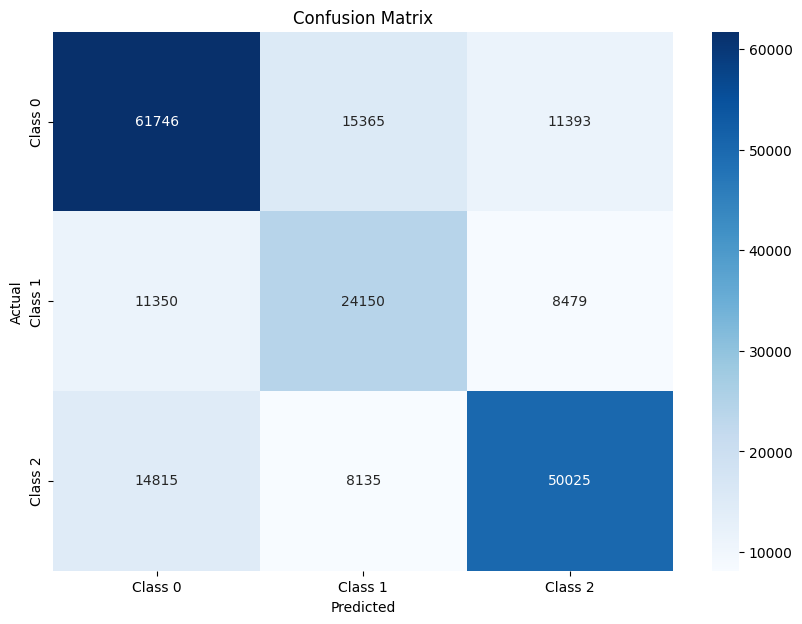

In [68]:
# inspect confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [69]:
X_train_resampled.shape

(528939, 132)

In [71]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Define hyperparameter distribution with valid values for max_features
param_dist = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],  # Updated here
}

# Perform Randomized Search
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=50,
    cv=3,
    n_jobs=-1,
    verbose=2,
    random_state=42,
    error_score='raise'  # Optional: raises an error on fit failures for debugging
)

# Fit the model
random_search.fit(X_train_resampled, y_train_resampled)

# Get the best model
best_rf_model = random_search.best_estimator_


C:\Users\Admin\anaconda3\envs\Manishma\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 48 is smaller than n_iter=50. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 48 candidates, totalling 144 fits


MemoryError: could not allocate 2097152 bytes

## Model training on test data set

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # You can choose other algorithms
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [42]:
# Features and target variable for training
X_train = cs_train_df_encoded.drop('IncidentGrade', axis=1)  # Features
y_train = cs_train_df_encoded['IncidentGrade']  # Target

# Features for testing (we only need the features)
X_test = cs_test_df_encoded.drop('IncidentGrade', axis=1)  # Test features
y_test = cs_test_df_encoded['IncidentGrade']  # Actual target for evaluation (if needed)



In [45]:
#Random forest model
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the random forest model
# rf_model = RandomForestClassifier(random_state=42)
# rf_model.fit(X_train_resampled, y_train_resampled)
rf_model = RandomForestClassifier(random_state=42)  # You can use other classifiers as well
rf_model.fit(X_train, y_train)
# Predict on test set
y_pred = rf_model.predict(X_test)

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion matrix:\n",confusion_matrix(y_test,y_pred))

Accuracy: 0.6068726107023014
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.80      0.68    429544
           1       0.52      0.28      0.36    224475
           2       0.66      0.59      0.62    373218

    accuracy                           0.61   1027237
   macro avg       0.59      0.55      0.55   1027237
weighted avg       0.60      0.61      0.59   1027237

Confusion matrix:
 [[341513  31080  56951]
 [106123  61928  56424]
 [127070  26187 219961]]
